# Parameters

In [28]:
CONFIG_LOCAL = False
CONFIG_LOCAL = True

In [29]:
if CONFIG_LOCAL:
    config = {
        'data_folder'   : 'probes',
        'RUN'           : 'run_BWA_JKL_23_JU_1_orig',
        'chromosome'    : 'SL2.40ch12',
        'scaffold'      : 'SL2.40sc05611',
        'out_folder'    : 'reports',
        'out_extensions': ['eps', 'png']
    }

    if True:
        config['BAC'            ] = 'JBPP0904'
        config['BAC_coord_start'] = 967164
        config['BAC_coord_end'  ] = 970727
        config['BAC_coord'      ] = '%012d-%012d' % ( config['BAC_coord_start'], config['BAC_coord_end'  ] )
        config['RUN'            ] = 'run_BWA_JKL_23_JU_1_orig_PROBES'

In [30]:
if CONFIG_LOCAL:
    %run -i probes_cfg.ipynb

In [31]:
if CONFIG_LOCAL:
    %run -i probes_cfg_header.ipynb

Config
	BAC            : JBPP0904
	BAC_coord      : 000000967164-000000970727
	BAC_coord_end  : 970727
	BAC_coord_start: 967164
	RUN            : run_BWA_JKL_23_JU_1_orig_PROBES
	chromosome     : SL2.40ch12
	data_folder    : probes
	out_extensions : ['eps', 'png', 'pdf']
	out_folder     : reports
	scaffold       : SL2.40sc05611
Max Rows     : 10000


# Imports

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import operator

#import pylab
#pylab.show()

%pylab inline

pd.set_option('display.notebook_repr_html', True)
#pd.set_option('display.max_columns', 20)
#pd.set_option('display.max_rows', 25)

from IPython.display import HTML, display
def addHeader(level, text):
    display( HTML('''<h%(level)d>%(text)s</h%(level)d>''' % {'level':level, 'text':text}) )

Populating the interactive namespace from numpy and matplotlib


# Files

## Input Files

In [33]:
addHeader(1,'Files')
addHeader(2,'Input Files')
"""
S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc06147.sam.cov
S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc06147.sam.cov.prop.cov
S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc06147.sam.pos
"""
config['agp_source_scaff_name'  ] = 'S_lycopersicum_chromosomes_from_scaffolds.2.40.agp'
config['agp_source_contig_name' ] = 'S_lycopersicum_chromosomes_from_contigs.2.40.agp'
config['fasta_name'             ] = 'S_lycopersicum_chromosomes.2.40.fa'
config['fasta_name2'            ] = 'S_lycopersicum_chromosomes'

config['cdna_alignments_name'   ] = 'ITAG2.3_cdna_alignments.gff3'
config['gene_models_name'       ] = 'ITAG2.3_gene_models.gff3'
config['genomic_reagents_name'  ] = 'ITAG2.3_genomic_reagents.gff3'
config['repeats_aggressive_name'] = 'ITAG2.3_repeats_aggressive.gff3'
config['repeats_name'           ] = 'ITAG2.3_repeats.gff3'


AgpSourceScaff          = "%(data_folder)s/extraGff/%(agp_source_scaff_name)s"   % config
AgpSourceContig         = "%(data_folder)s/extraGff/%(agp_source_contig_name)s"  % config
AgpContigFile           = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.contig.agp.cov"  % config
AgpGapFile              = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.gap.agp.cov"     % config
AgpOtherFile            = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.other.agp.cov"   % config
AgpUnknownFile          = "%(data_folder)s/agp/S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.unknown.agp.cov" % config

FastaFile               = "%(data_folder)s/extraGff/%(fasta_name)s"              % config
cdna_alignments_name    = "%(data_folder)s/extraGff/%(cdna_alignments_name)s"    % config
gene_models_name        = "%(data_folder)s/extraGff/%(gene_models_name)s"        % config
genomic_reagents_name   = "%(data_folder)s/extraGff/%(genomic_reagents_name)s"   % config
repeats_aggressive_name = "%(data_folder)s/extraGff/%(repeats_aggressive_name)s" % config
repeats_name            = "%(data_folder)s/extraGff/%(repeats_name)s"            % config

KmerCoverageFile        = "%(data_folder)s/%(RUN)s/%(fasta_name2)s_S_lycopersicum_scaffolds.sam.%(chromosome)s.sam.%(scaffold)s.sam.cov.prop.cov" % config

SequencingCoverageFile  = "%(data_folder)s/mapping/out/%(fasta_name2)s_S_lycopersicum_chromosomes.pos.%(chromosome)s.pos.cov.%(scaffold)s.cov"    % config
SamFile                 = "%(data_folder)s/mapping/out/%(fasta_name2)s.fa_%(fasta_name2)s.sam.gz" % config

NsFile                  = "%(data_folder)s/Ns/S_lycopersicum_scaffolds.fa_NONE.tab.%(chromosome)s.tab.%(scaffold)s.tab.cov"     % config

if BAC_MODE:
    """

                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_chromosomes.pos.SL2.40ch12.pos.cov.SL2.40sc05611.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.sam.SL2.40sc05611.sam.cov.prop.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727_Product.fasta.blast.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.contig.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.gap.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.other.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.unknown.agp.cov
                                                      S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds.fa_NONE.tab.SL2.40ch12.tab.SL2.40sc05611.tab.cov
    """
                                                      
    config['in_base_name'] = "%(data_folder)s/%(RUN)s/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.%(chromosome)s.%(scaffold)s.%(BAC)s_primer.%(BAC_coord)s" % config
    KmerCoverageFile       =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.%(chromosome)s.sam.%(scaffold)s.sam.cov.prop.cov" % config
    SequencingCoverageFile =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_chromosomes.fa_S_lycopersicum_chromosomes.pos.%(chromosome)s.pos.cov.%(scaffold)s.cov"        % config
    BlastCoverageFile      =                                                                                                                                      "%(in_base_name)s_Product.fasta.blast.cov"                                                         % config
    AgpContigFile          =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.contig.agp.cov"  % config
    AgpGapFile             =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.gap.agp.cov"     % config
    AgpOtherFile           =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.other.agp.cov"   % config
    AgpUnknownFile         =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds_from_contigs.2.40.agp.%(scaffold)s.agp.unknown.agp.cov" % config
    NsFile                 =                                                                                                                                      "%(in_base_name)s.S_lycopersicum_scaffolds.fa_NONE.tab.%(chromosome)s.tab.%(scaffold)s.tab.cov"    % config

    
infiles                 = [
    AgpSourceScaff          , AgpSourceContig         ,
    AgpContigFile           , AgpGapFile              ,
    AgpOtherFile            , AgpUnknownFile          ,
    FastaFile               , cdna_alignments_name    ,
    gene_models_name        , genomic_reagents_name   ,
    repeats_aggressive_name , repeats_name            ,
    KmerCoverageFile        , SequencingCoverageFile  ,
    SamFile                 , NsFile                  
]

print "%-23s: %-5s %s" % ( "AgpSourceScaff"         , os.path.exists(AgpSourceScaff)         , AgpSourceScaff          )
print "%-23s: %-5s %s" % ( "AgpSourceContig"        , os.path.exists(AgpSourceContig)        , AgpSourceContig         )
print "%-23s: %-5s %s" % ( "AgpContigFile"          , os.path.exists(AgpContigFile)          , AgpContigFile           )
print "%-23s: %-5s %s" % ( "AgpGapFile"             , os.path.exists(AgpGapFile)             , AgpGapFile              )
print "%-23s: %-5s %s" % ( "AgpOtherFile"           , os.path.exists(AgpOtherFile)           , AgpOtherFile            )
print "%-23s: %-5s %s" % ( "AgpUnknownFile"         , os.path.exists(AgpUnknownFile)         , AgpUnknownFile          )
print "%-23s: %-5s %s" % ( "FastaFile"              , os.path.exists(FastaFile)              , FastaFile               )
print "%-23s: %-5s %s" % ( "cdna_alignments_name"   , os.path.exists(cdna_alignments_name)   , cdna_alignments_name    )
print "%-23s: %-5s %s" % ( "gene_models_name"       , os.path.exists(gene_models_name)       , gene_models_name        )
print "%-23s: %-5s %s" % ( "genomic_reagents_name"  , os.path.exists(genomic_reagents_name)  , genomic_reagents_name   )
print "%-23s: %-5s %s" % ( "repeats_aggressive_name", os.path.exists(repeats_aggressive_name), repeats_aggressive_name )
print "%-23s: %-5s %s" % ( "repeats_name"           , os.path.exists(repeats_name)           , repeats_name            )
print "%-23s: %-5s %s" % ( "KmerCoverageFile"       , os.path.exists(KmerCoverageFile)       , KmerCoverageFile        )
print "%-23s: %-5s %s" % ( "SequencingCoverageFile" , os.path.exists(SequencingCoverageFile) , SequencingCoverageFile  )
print "%-23s: %-5s %s" % ( "SamFile"                , os.path.exists(SamFile)                , SamFile                 )
print "%-23s: %-5s %s" % ( "NsFile"                 , os.path.exists(NsFile)                 , NsFile                  )

if BAC_MODE:
    print "%-23s: %-5s %s" % ( "BlastCoverageFile" , os.path.exists(BlastCoverageFile)     , BlastCoverageFile      )
    infiles.append(BlastCoverageFile)
    
print



if not all([os.path.exists(x) for x in infiles]):
    print "missing file"

else:
    print "all files present"
    

AgpSourceScaff         : True  probes/extraGff/S_lycopersicum_chromosomes_from_scaffolds.2.40.agp
AgpSourceContig        : True  probes/extraGff/S_lycopersicum_chromosomes_from_contigs.2.40.agp
AgpContigFile          : True  probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.contig.agp.cov
AgpGapFile             : True  probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.agp.gap.agp.cov
AgpOtherFile           : True  probes/run_BWA_JKL_23_JU_1_orig_PROBES/S_lycopersicum_chromosomes.fa_S_lycopersicum_scaffolds.sam.SL2.40ch12.SL2.40sc05611.JBPP0904_primer.000000967164-000000970727.S_lycopersicum_scaffolds_from_contigs.2.40.agp.SL2.40sc05611.

## Output Files

In [34]:
addHeader(2,'Output Files')

config['out_bn'        ] = "%(out_folder)s/%%s/%(RUN)s_%(chromosome)s_%(scaffold)s_prop" % config
config['out_bn_img'    ] = "%(out_bn)s.%%s.%%s"                                            % config

if BAC_MODE:
    config['out_bn'       ] = "%(out_folder)s/%%s/%(RUN)s_%(chromosome)s_%(scaffold)s_%(BAC)s_%(BAC_coord)s" % config
    config['out_bn_img'   ] = "%(out_bn)s.%%s.%%s"                                                             % config

    
output_files = {
    'all_data'                        : [ config['out_bn_img']  % (ext, 'raw_data'                        , 'csv'     ) for ext in config['out_extensions'] ],
    'all_data_full'                   : [ config['out_bn_img']  % (ext, 'K-raw_data'                      , 'full.csv') for ext in config['out_extensions'] ],
    'K-mer Coverage Stats'            : [ config['out_bn_img']  % (ext, 'K-mer_Coverage_Stats'            , ext       ) for ext in config['out_extensions'] ],
    'Sequencing Coverage Stats'       : [ config['out_bn_img']  % (ext, 'Sequencing_Coverage_Stats'       , ext       ) for ext in config['out_extensions'] ],
    'K-mer Coverage Distribution'     : [ config['out_bn_img']  % (ext, 'K-mer_Coverage_Distribution'     , ext       ) for ext in config['out_extensions'] ],
    'Sequencing Coverage Distribution': [ config['out_bn_img']  % (ext, 'Sequencing_Coverage_Distribution', ext       ) for ext in config['out_extensions'] ],
    'Gaps Distribution'               : [ config['out_bn_img']  % (ext, 'Gaps_Distribution'               , ext       ) for ext in config['out_extensions'] ],
    'Ns Distribution'                 : [ config['out_bn_img']  % (ext, 'Ns_Distribution'                 , ext       ) for ext in config['out_extensions'] ],
    'Combined graph'                  : [ config['out_bn_img']  % (ext, 'Combined_graph'                  , ext       ) for ext in config['out_extensions'] ]
}


if BAC_MODE:
    output_files['BLAST Coverage Stats'       ] = [ config['out_bn_img'] % (ext, 'BLAST_Coverage_Stats'       , ext) for ext in config['out_extensions'] ]
    output_files['BLAST Coverage Distribution'] = [ config['out_bn_img'] % (ext, 'BLAST_Coverage_Distribution', ext) for ext in config['out_extensions'] ]

    
for of in sorted(output_files.keys()):
    print "%-32s:\n - %s" % ( of, "\n - ".join( output_files[of] ) )

BLAST Coverage Distribution     :
 - reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.eps
 - reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.png
 - reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Distribution.pdf
BLAST Coverage Stats            :
 - reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.eps
 - reports/png/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.png
 - reports/pdf/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_000000967164-000000970727.BLAST_Coverage_Stats.pdf
Combined graph                  :
 - reports/eps/run_BWA_JKL_23_JU_1_orig_PROBES_SL2.40ch12_SL2.40sc05611_JBPP0904_0000

In [35]:
col_type_int16 = np.int16
col_type_int32 = np.int32
col_type_int   = np.int64
col_type_flo   = np.float64
col_type_flo32 = np.float32
col_type_str   = np.object
col_type_str   = np.str
col_type_str   = np.str_
col_type_str   = np.string_
col_type_bol   = np.int8
col_type_char  = np.character
col_type_char  = np.dtype('a1')

In [36]:
import gzip
def open_file(infile, mode):
    if infile.endswith('.gz'):
        if 'b'not in mode:
            mode = mode + 'b'
        return gzip.open(infile, mode)
    else:
        return open(infile, mode)

In [37]:
class size_controller(object):
    def __init__(self, w, h):
        self.w = w
        self.h = h
        
    def __enter__(self):
        self.o = rcParams['figure.figsize']
        rcParams['figure.figsize'] = self.w, self.h
        return None
    
    def __exit__(self, type, value, traceback):
        rcParams['figure.figsize'] = self.o

In [38]:
class coortroller(object):
    def __init__(self, arr, keys):
        self.arr    = arr
        self.keys   = keys
    
    def add(self, chrom, start, end, value):
        chrom_start = self.keys[chrom]['cumm']
        add_start   = chrom_start + start
        add_end     = chrom_start + end
        #print "chromosome %s chromosome start %d start %d end %d real start %d real end %d value %d" % (chrom, chrom_start, start, end, add_start, add_end, value)
        #print self.arr[add_start-2:add_end+1]
        self.arr[add_start-1:add_end] += 1
        #print self.arr[add_start-2:add_end+1]

In [39]:
def parse_CSV( infile, col_info, delimiter="\t", comment="#", header=None, 
              skiprows=0, nrows=None, verbose=False, converters=None, print_log=True ):
    
    col_names = [cf[0] for cf in col_info]
    col_types = dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))
    
    if print_log:
        print "parsing", infile
    
    if verbose or print_log:
        with open(infile, 'r') as fhd:
            f = 0
            for line in fhd:
                print line,
                f += 1
                if f == 5:
                    break
    
    data  = pd.read_csv(infile, header=header, names=col_names, dtype=col_types, nrows=nrows,
                        skiprows=skiprows, verbose=verbose, delimiter=delimiter, comment=comment, 
                        converters=converters)

    if print_log:
        print "Loaded %d rows and %d columns" % ( data.shape[0], data.shape[1] )

    if verbose or print_log:
        print data.head(1)
        print data.tail(1)
    
    return data

In [40]:
def to_coverage(tab_data, col_name, start_name, end_name, chromTotalLen, chroms, dtype=col_type_bol, print_log=True, cov_data=None):
    if cov_data == None:
        cov_data    = np.zeros(chromTotalLen, dtype=dtype)
        
    data_controller   = coortroller(cov_data, chroms)
    total_coord_count = 0
    total_pos_count   = 0
    
    for col in tab_data[col_name].unique():
        if print_log:
            print col_name, col,
            print 'filtering data',
        
        cold = tab_data[ tab_data[col_name] == col ]

        if print_log:
            #print 'chromd', chromd.head()
            print 'adding coordinates',
        
        coord_count = 0
        pos_count   = 0
        
        for v in cold[[start_name, end_name]].iterrows():
            start        = min([v[1][0], v[1][1]])
            end          = max([v[1][0], v[1][1]])
            coord_count += 1
            pos_count   += end - start
            #print "Start:'" + str(start) + "' End: '" + str(end) + "'"
            data_controller.add(col, start, end, 1)
            #break
        #break
        total_coord_count += coord_count
        total_pos_count   += pos_count
        if print_log:
            print 'added %10d coordinates in a total of %10d positions' % ( coord_count, pos_count )
    
    if print_log:
        print 'added %10d coordinates in a total of %10d positions' % ( total_coord_count, total_pos_count )

    return cov_data

In [41]:
def process_process( proc ):
    if not proc['enabled']:
        return
        
    addHeader(3, proc['title'])
    
    
    of = None
    if 'filter' in proc:
        of = proc['filter_out_file']
    else:
        of = proc['parser_parameters'][0][0]
    
    if 'cov' not in proc:
        if 'data' not in proc or 'data' not in proc['data']:
            if 'filter' in proc and 'filtered' not in proc:
                print "filtering"

                if   len( proc['filter_parameters'][0] ) == 2:
                    proc['filter_parameters'][0].append( proc['filter_in_file' ] )
                    proc['filter_parameters'][0].append( proc['filter_out_file'] )

                elif len( proc['filter_parameters'][0] ) == 4:
                    proc['filter_parameters'][0][2] = proc['filter_in_file' ]
                    proc['filter_parameters'][0][3] = proc['filter_out_file']

                proc['filter'           ]( *proc['filter_parameters'][0], **proc['filter_parameters'][1] )
                proc['parser_parameters'][0][0] = proc['filter_out_file']
                proc['filtered'         ] = True
        
            if os.path.exists(of + '.df.h5') and False:
                print "loading data from h5"
                proc['data']         = pd.HDFStore( of + '.df.h5' )

            else:
                print "loading data from raw"
                #proc['data']         = pd.HDFStore( of + '.df.h5' )
                #proc['data']['data'] = proc['parser'   ]( *proc['parser_parameters'   ][0], **proc['parser_parameters'   ][1] )
                proc['data']         = {}
                proc['data']['data'] = proc['parser'   ]( *proc['parser_parameters'   ][0], **proc['parser_parameters'   ][1] )

                
        converter_parameters = proc['converter_parameters'][0]
        converter_parameters.insert(0, proc['data']['data'])
        
        if os.path.exists(of + '.cov.npy'):
            print "loading coverage from pickle"
            proc['cov'] = np.load( open(of + '.cov.npy', 'rb') )

        else:
            print "loading coverage from raw"
            proc['cov'] = proc['converter']( *converter_parameters, **proc['converter_parameters'][1])
            np.save( open(of + '.cov.npy', 'wb'), proc['cov'] )

In [42]:
#http://www.ncbi.nlm.nih.gov/projects/genome/assembly/agp/AGP_Specification.shtml
# A Active Finishing
# D Draft HTG (often phase1 and phase2 are called Draft, whether or not they have the draft keyword).
# F Finished HTG (phase3)
# G Whole Genome Finishing
# O Other sequence (typically means no HTG keyword)
# P Pre Draft
# W WGS contig
# N gap with specified size
# U gap of unknown size, defaulting to 100 bases.
#!touch {AgpSource}.tst
import os
def filter_col(col_num, col_val, infile, outfile, contains=None, misses=None, skip=None):
    if os.path.exists(outfile):
        print "output file %s exists" % outfile
        return
    
    ext_str  = ""
    ext_str += " Contains: %s" % ", ".join(contains) if contains is not None else ""
    ext_str += " Misses: %s"   % ", ".join(misses  ) if misses   is not None else ""
    ext_str += " Skip: %s"     % ", ".join(skip    ) if skip     is not None else ""
    print "Filtering %s for %s. saving in %s.%s" % ( infile, ", ".join(col_val), outfile, ext_str )
    
    with open(outfile, 'w') as ofhd:
        with open(infile, 'r') as ifhd:
            for line in ifhd:
                lines = line.strip()
                if len(lines) == 0:
                    ofhd.write(line)
                    continue
                
                if skip is not None:
                    if any([c in line for c in skip]):
                        continue
                
                if lines[0] == "#":
                    ofhd.write(line)
                    continue

                cols = lines.split("\t")
                if len(cols) <= col_num:
                    continue
                    
                if cols[col_num] in col_val:
                    cts = True
                    if contains is not None:
                        if not all([c in line for c in contains]):
                            cts = False
                    if misses is not None:
                        if any([c in line for c in misses]):
                            cts = False
                    if cts:
                        ofhd.write(line)

# Read Files

In [43]:
addHeader(1,'Read Files')

In [44]:
addHeader(2,'Fasta')

In [45]:
from collections import OrderedDict
import cPickle as pickle

chroms          = OrderedDict()
FastaFilePickle = FastaFile + '.pkl'

if os.path.exists(FastaFilePickle):
    print "loading fasta pickle"
    chroms = pickle.load(open(FastaFilePickle, 'rb'))
    
else:
    print "loading fasta"
    lastChrom = None
    with open(FastaFile, 'r') as fhd:
        cumm = 0
        for line in fhd:
            line = line.strip()

            if len(line) == 0:
                continue

            if line[0] == ">":
                lastChrom  = line[1:]
                chroms[lastChrom] = { 'size': 0, 'cumm': cumm+1 }
                continue

            ll = len(line)
            chroms[lastChrom]['size'] += ll
            cumm += ll

    pickle.dump(chroms, open(FastaFilePickle,'wb'), pickle.HIGHEST_PROTOCOL)
    
print "\n".join( [ "%-15s size %12d cummulative size %12d" % ( x, chroms[x]['size'], chroms[x]['cumm'] ) for x in chroms ] )

loading fasta pickle
SL2.40ch00      size     21805821 cummulative size            1
SL2.40ch01      size     90304244 cummulative size     21805822
SL2.40ch02      size     49918294 cummulative size    112110066
SL2.40ch03      size     64840714 cummulative size    162028360
SL2.40ch04      size     64064312 cummulative size    226869074
SL2.40ch05      size     65021438 cummulative size    290933386
SL2.40ch06      size     46041636 cummulative size    355954824
SL2.40ch07      size     65268621 cummulative size    401996460
SL2.40ch08      size     63032657 cummulative size    467265081
SL2.40ch09      size     67662091 cummulative size    530297738
SL2.40ch10      size     64834305 cummulative size    597959829
SL2.40ch11      size     53386025 cummulative size    662794134
SL2.40ch12      size     65486253 cummulative size    716180159


In [46]:
chromTotalLen = sum([chroms[x]['size'] for x in chroms])
print "chromTotalLen", chromTotalLen

chromTotalLen 781666411


In [47]:
addHeader(2,'Setup')

In [48]:
col_info_agp_w = [
    [ "Chromosome"                           , col_type_str  ], 
    [ "Start"                                , col_type_int  ], 
    [ "End"                                  , col_type_int  ], 
    [ "Seq"                                  , col_type_int  ], 
    [ "Type"                                 , col_type_char ], 
    [ "Scaffold"                             , col_type_str  ], 
    [ "Begin"                                , col_type_int  ],
    [ "Finish"                               , col_type_int  ],
    [ "Orientation"                          , col_type_char ]
]

col_info_agp_u = [
    [ "Chromosome"                           , col_type_str ], 
    [ "Start"                                , col_type_int ], 
    [ "End"                                  , col_type_int ], 
    [ "Seq"                                  , col_type_int ], 
    [ "Type"                                 , col_type_char], 
    [ "GapLength"                            , col_type_int ], 
    [ "GapType"                              , col_type_str ], 
    [ "Linkage"                              , col_type_str ]
]

col_info_agp_n = [
    [ "Chromosome"                           , col_type_str ], 
    [ "Start"                                , col_type_int ], 
    [ "End"                                  , col_type_int ], 
    [ "Seq"                                  , col_type_int ], 
    [ "Type"                                 , col_type_char], 
    [ "GapLength"                            , col_type_int ], 
    [ "GapType"                              , col_type_str ], 
    [ "Linkage"                              , col_type_str ],
    [ "Empty"                                , col_type_str ]
]


col_info_gff = [
    [ "Chromosome"                           , col_type_str ], 
    [ "Name"                                 , col_type_str ],
    [ "Type"                                 , col_type_str ],
    [ "Start"                                , col_type_int ], 
    [ "End"                                  , col_type_int ], 
    #[ "Qual"                                 , col_type_flo ], 
    [ "Qual"                                 , col_type_str ], 
    [ "Orientation"                          , col_type_char], 
    [ "Filter"                               , col_type_str ],
    [ "Info"                                 , col_type_str ]   
]

In [49]:
processes   = []
PARSE_AGP   = True
PARSE_GFF   = True
PARSE_BLAST = True

In [50]:
if PARSE_AGP:
    agp_to_parse = [ 
        #f_file, f_type, f_filter, f_enabled, f_info in 
        [AgpSourceScaff , 'Scaffold', 'A', False, col_info_agp_w, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'D', False, col_info_agp_w, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'F', False, col_info_agp_w, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'G', False, col_info_agp_w, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'O', False, col_info_agp_w, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'P', False, col_info_agp_w, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'W', True , col_info_agp_w, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'N', False, col_info_agp_n, col_type_bol], 
        [AgpSourceScaff , 'Scaffold', 'U', True , col_info_agp_u, col_type_bol],

        [AgpSourceContig, 'Contig'  , 'A', False, col_info_agp_w, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'D', False, col_info_agp_w, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'F', False, col_info_agp_w, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'G', False, col_info_agp_w, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'O', False, col_info_agp_w, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'P', False, col_info_agp_w, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'W', True , col_info_agp_w, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'N', True , col_info_agp_n, col_type_bol], 
        [AgpSourceContig, 'Contig'  , 'U', True , col_info_agp_u, col_type_bol]
    ]

In [51]:
if PARSE_AGP:
    for f_file, f_type, f_filter, f_enabled, f_info, f_type in agp_to_parse:
        if not f_enabled:
            continue

        cfg = { 
                'title'            : 'AGP %s :: %s' % (f_filter, f_type),
                'name'             : 'AGP %s %s'    % (f_filter, f_type),
                'enabled'          : f_enabled,
                'filter'           : filter_col,
                'filter_in_file'   : f_file,
                'filter_out_file'  : f_file + '.%s.agp' % f_filter,
                'filter_parameters': [
                    [ 4, [f_filter            ] ],
                    {}
                ],
                'parser'  : parse_CSV,
                'parser_parameters': [
                    [
                        None, 
                        f_info
                    ],
                    {
                        'skiprows': 0, 
                        'nrows'   : NROWS,
                        'verbose' : PARSE_VERBOSE
                    }
                ],
                'converter': to_coverage,
                'converter_parameters': [
                    ["Chromosome", "Start", "End", chromTotalLen, chroms],
                    {'dtype'   : f_type}
                ]
        }

        processes.append(cfg)

In [52]:
if PARSE_GFF:
    f_kwargs0={}
    f_kwargs1={ 'skip':['###']}
    
    p_kwargs0={ 'skiprows': 0, 'nrows': NROWS, 'verbose': PARSE_VERBOSE }
    p_kwargs1={ 'skiprows': 1, 'nrows': NROWS, 'verbose': PARSE_VERBOSE }
    p_kwargs2={ 'skiprows': 1, 'nrows': NROWS, 'verbose': PARSE_VERBOSE }
    p_kwargs3={ 'skiprows': 1, 'nrows': NROWS, 'verbose': PARSE_VERBOSE }

    c_kwargs0 = {}
    c_kwargs1 = {'dtype': col_type_int16}

    #    f_file                 , f_type      , f_filter       , f_name          , f_enabled, f_info      , p_kwargs , f_kwargs       in 
    gff_to_parse = [ 
        [cdna_alignments_name   , 'cDNA'      , 'match'        , 'match'         , True     , col_info_gff, p_kwargs3, f_kwargs0, c_kwargs1], 
        [cdna_alignments_name   , 'cDNA'      , 'match_part'   , 'match_part'    , True     , col_info_gff, p_kwargs3, f_kwargs0, c_kwargs1], 

        [gene_models_name       , 'Gene Model', 'gene'         , 'gene'          , True     , col_info_gff, p_kwargs3, f_kwargs1, c_kwargs0], 
        [gene_models_name       , 'Gene Model', 'mRNA'         , 'mRNA'          , True     , col_info_gff, p_kwargs3, f_kwargs1, c_kwargs0], 
        [gene_models_name       , 'Gene Model', 'exon'         , 'exon'          , True     , col_info_gff, p_kwargs3, f_kwargs1, c_kwargs0], 
        [gene_models_name       , 'Gene Model', 'CDS'          , 'CDS'           , True     , col_info_gff, p_kwargs3, f_kwargs1, c_kwargs0], 
        [gene_models_name       , 'Gene Model', 'intron'       , 'intron'        , True     , col_info_gff, p_kwargs3, f_kwargs1, c_kwargs0], 

        [genomic_reagents_name  , 'BAC'       , 'BAC_clone'    , 'BAC_clone'     , True     , col_info_gff, p_kwargs3, f_kwargs0, c_kwargs0], 
        [genomic_reagents_name  , 'BAC'       , 'BAC_end'      , 'BAC_end'       , True     , col_info_gff, p_kwargs3, f_kwargs0, c_kwargs0], 

        [repeats_aggressive_name, 'Repeat'    , 'repeat_region', 'Copia'         , True     , col_info_gff, p_kwargs1, {'contains':['repeat_class=LTR/Copia;'     ], 'skip':['###']}, c_kwargs0], 
        [repeats_aggressive_name, 'Repeat'    , 'repeat_region', 'LTR'           , True     , col_info_gff, p_kwargs1, {'contains':['repeat_class=LTR;'           ], 'skip':['###']}, c_kwargs0],
        [repeats_aggressive_name, 'Repeat'    , 'repeat_region', 'Low_complexity', True     , col_info_gff, p_kwargs1, {'contains':['repeat_class=Low_complexity;'], 'skip':['###']}, c_kwargs0],
        [repeats_aggressive_name, 'Repeat'    , 'repeat_region', 'Gypsy'         , True     , col_info_gff, p_kwargs1, {'contains':['repeat_class=LTR/Gypsy;'     ], 'skip':['###']}, c_kwargs0],
        [repeats_aggressive_name, 'Repeat'    , 'repeat_region', 'Simple_repeat' , True     , col_info_gff, p_kwargs1, {'contains':['repeat_class=Simple_repeat;' ], 'skip':['###']}, c_kwargs0],
        [repeats_aggressive_name, 'Repeat'    , 'repeat_region', 'SINE'          , True     , col_info_gff, p_kwargs1, {'contains':['repeat_class=SINE;'          ], 'skip':['###']}, c_kwargs0],

        [repeats_name           , 'Repeat'    , 'repeat_region', 'Copia'         , False    , col_info_gff, p_kwargs1, {'contains':['repeat_class=LTR/Copia;'     ], 'skip':['###']}, c_kwargs0], 
        [repeats_name           , 'Repeat'    , 'repeat_region', 'LTR'           , False    , col_info_gff, p_kwargs1, {'contains':['repeat_class=LTR;'           ], 'skip':['###']}, c_kwargs0],
        [repeats_name           , 'Repeat'    , 'repeat_region', 'Low_complexity', False    , col_info_gff, p_kwargs1, {'contains':['repeat_class=Low_complexity;'], 'skip':['###']}, c_kwargs0],
        [repeats_name           , 'Repeat'    , 'repeat_region', 'Gypsy'         , False    , col_info_gff, p_kwargs1, {'contains':['repeat_class=LTR/Gypsy;'     ], 'skip':['###']}, c_kwargs0],
        [repeats_name           , 'Repeat'    , 'repeat_region', 'Simple_repeat' , False    , col_info_gff, p_kwargs1, {'contains':['repeat_class=Simple_repeat;' ], 'skip':['###']}, c_kwargs0],
        [repeats_name           , 'Repeat'    , 'repeat_region', 'SINE'          , False    , col_info_gff, p_kwargs1, {'contains':['repeat_class=SINE;'          ], 'skip':['###']}, c_kwargs0],
    ]

In [53]:
if PARSE_GFF:
    for  f_file                 , f_type      , f_filter       , f_name          , f_enabled, f_info      , p_kwargs , f_kwargs, c_kwargs       in gff_to_parse:
        if not f_enabled:
            continue

        processes.append(
            { 
                'title'            : 'GFF %s :: %s :: %s' % (f_filter, f_type, f_name),
                'name'             : 'GFF %s %s %s'       % (f_filter, f_type, f_name),
                'enabled'          : f_enabled,
                'filter'           : filter_col,
                'filter_in_file'   : f_file,
                'filter_out_file'  : f_file + '.%s.agp' % f_name,
                'filter_parameters': [
                    [ 2, [f_filter            ] ],
                    f_kwargs
                ],
                'parser'           : parse_CSV,
                'parser_parameters': [
                    [
                        None, 
                        f_info
                    ],
                    p_kwargs
                ],
                'converter'           : to_coverage,
                'converter_parameters': [
                    ["Chromosome", "Start", "End", chromTotalLen, chroms],
                    c_kwargs
                ]
            }
        )

In [54]:
for proc in processes:
    process_process( proc )
print 'done'

filtering
output file probes/extraGff/S_lycopersicum_chromosomes_from_scaffolds.2.40.agp.W.agp exists
loading data from raw
parsing probes/extraGff/S_lycopersicum_chromosomes_from_scaffolds.2.40.agp.W.agp
SL2.40ch00	1	2191949	1	W	SL2.40sc05082	1	2191949	0
SL2.40ch00	2192050	4157734	3	W	SL2.40sc04025	1	1965685	0
SL2.40ch00	4157835	5737169	5	W	SL2.40sc06396	1	1579335	0
SL2.40ch00	5737270	6535031	7	W	SL2.40sc05224	1	797762	0
SL2.40ch00	6535132	7096334	9	W	SL2.40sc04463	1	561203	0
Loaded 3223 rows and 9 columns
   Chromosome  Start      End  Seq Type       Scaffold  Begin   Finish  \
0  SL2.40ch00      1  2191949    1    W  SL2.40sc05082      1  2191949   

  Orientation  
0           0  
      Chromosome     Start       End  Seq Type       Scaffold  Begin   Finish  \
3222  SL2.40ch12  62938852  65486253   19    W  SL2.40sc05380      1  2547402   

     Orientation  
3222           -  
loading coverage from raw
Chromosome SL2.40ch00 filtering data adding coordinates added       3132 coordi

filtering
output file probes/extraGff/S_lycopersicum_chromosomes_from_scaffolds.2.40.agp.U.agp exists
loading data from raw
parsing probes/extraGff/S_lycopersicum_chromosomes_from_scaffolds.2.40.agp.U.agp
SL2.40ch00	2191950	2192049	2	U	100	contig	no
SL2.40ch00	4157735	4157834	4	U	100	contig	no
SL2.40ch00	5737170	5737269	6	U	100	contig	no
SL2.40ch00	6535032	6535131	8	U	100	contig	no
SL2.40ch00	7096335	7096434	10	U	100	contig	no
Loaded 3210 rows and 8 columns
   Chromosome    Start      End  Seq Type  GapLength GapType Linkage
0  SL2.40ch00  2191950  2192049    2    U        100  contig      no
      Chromosome     Start       End  Seq Type  GapLength GapType Linkage
3209  SL2.40ch12  62938752  62938851   18    U        100  contig      no
loading coverage from raw
Chromosome SL2.40ch00 filtering data adding coordinates added       3131 coordinates in a total of     309969 positions
Chromosome SL2.40ch01 filtering data adding coordinates added          8 coordinates in a total of        

filtering
output file probes/extraGff/S_lycopersicum_chromosomes_from_contigs.2.40.agp.W.agp exists
loading data from raw
parsing probes/extraGff/S_lycopersicum_chromosomes_from_contigs.2.40.agp.W.agp
SL2.40ch00	1	119287	1	W	SL2.40ct20246	1	119287	+
SL2.40ch00	125011	126060	3	W	SL2.40ct20247	1	1050	+
SL2.40ch00	128865	208681	5	W	SL2.40ct20248	1	79817	+
SL2.40ch00	210864	211580	7	W	SL2.40ct20249	1	717	+
SL2.40ch00	216054	290917	9	W	SL2.40ct20250	1	74864	+
Loaded 26877 rows and 9 columns
   Chromosome  Start     End  Seq Type       Scaffold  Begin  Finish  \
0  SL2.40ch00      1  119287    1    W  SL2.40ct20246      1  119287   

  Orientation  
0           +  
       Chromosome     Start       End   Seq Type       Scaffold  Begin  \
26876  SL2.40ch12  65485629  65486253  3819    W  SL2.40ct21097      1   

       Finish Orientation  
26876     625           -  
loading coverage from raw
Chromosome SL2.40ch00 filtering data adding coordinates added       4475 coordinates in a total of   

filtering
output file probes/extraGff/S_lycopersicum_chromosomes_from_contigs.2.40.agp.N.agp exists
loading data from raw
parsing probes/extraGff/S_lycopersicum_chromosomes_from_contigs.2.40.agp.N.agp
SL2.40ch00	119288	125010	2	N	5723	fragment	yes	
SL2.40ch00	126061	128864	4	N	2804	fragment	yes	
SL2.40ch00	208682	210863	6	N	2182	fragment	yes	
SL2.40ch00	211581	216053	8	N	4473	fragment	yes	
SL2.40ch00	290918	293964	10	N	3047	fragment	yes	
Loaded 23374 rows and 9 columns
   Chromosome   Start     End  Seq Type  GapLength   GapType Linkage Empty
0  SL2.40ch00  119288  125010    2    N       5723  fragment     yes   NaN
       Chromosome     Start       End   Seq Type  GapLength   GapType Linkage  \
23373  SL2.40ch12  65485120  65485628  3818    N        509  fragment     yes   

      Empty  
23373   NaN  
loading coverage from raw
Chromosome SL2.40ch00 filtering data adding coordinates added       1329 coordinates in a total of    2823259 positions
Chromosome SL2.40ch01 filtering data ad

filtering
output file probes/extraGff/S_lycopersicum_chromosomes_from_contigs.2.40.agp.U.agp exists
loading data from raw
parsing probes/extraGff/S_lycopersicum_chromosomes_from_contigs.2.40.agp.U.agp
SL2.40ch00	2014457	2014556	130	U	100	clone	yes
SL2.40ch00	2191950	2192049	162	U	100	contig	no
SL2.40ch00	3258917	3259016	224	U	100	clone	yes
SL2.40ch00	3286501	3286600	234	U	100	clone	yes
SL2.40ch00	3373149	3373248	256	U	100	clone	yes
Loaded 3490 rows and 8 columns
   Chromosome    Start      End  Seq Type  GapLength GapType Linkage
0  SL2.40ch00  2014457  2014556  130    U        100   clone     yes
      Chromosome     Start       End   Seq Type  GapLength GapType Linkage
3489  SL2.40ch12  64077390  64077489  3770    U        100   clone     yes
loading coverage from raw
Chromosome SL2.40ch00 filtering data adding coordinates added       3145 coordinates in a total of     311355 positions
Chromosome SL2.40ch01 filtering data adding coordinates added         33 coordinates in a total of 

filtering
output file probes/extraGff/ITAG2.3_cdna_alignments.gff3.match.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_cdna_alignments.gff3.match.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	ITAG_microtom_flcdnas	match	16453	18042	0.999	+	.	ID=gene1_0;Name=LEFL1056DG06;Target=LEFL1056DG06 28 1617 +
SL2.40ch00	ITAG_transcripts_tomato	match	16503	16981	100	+	.	ID=match000001;Target=BE451296 1 479;species=SOLLC_v2
Loaded 441535 rows and 9 columns
   Chromosome                   Name   Type  Start    End   Qual Orientation  \
0  SL2.40ch00  ITAG_microtom_flcdnas  match  16453  18042  0.999           +   

  Filter                                               Info  
0      .  ID=gene1_0;Name=LEFL1056DG06;Target=LEFL1056DG...  
        Chromosome                     Name   Type     Start       End Qual  \
441534  SL2.40ch12  ITAG_transcripts_tomato 

filtering
output file probes/extraGff/ITAG2.3_cdna_alignments.gff3.match_part.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_cdna_alignments.gff3.match_part.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	ITAG_microtom_flcdnas	match_part	16453	18042	0.999	+	.	Parent=gene1_0
SL2.40ch00	ITAG_microtom_flcdnas	match_part	570573	570897	0.978	-	.	Parent=gene2_0-i2
Loaded 359757 rows and 9 columns
   Chromosome                   Name        Type  Start    End   Qual  \
0  SL2.40ch00  ITAG_microtom_flcdnas  match_part  16453  18042  0.999   

  Orientation Filter            Info  
0           +      .  Parent=gene1_0  
        Chromosome                     Name        Type     Start       End  \
359756  SL2.40ch12  ITAG_transcripts_tomato  match_part  65483863  65484152   

       Qual Orientation Filter  \
359756   99           +      .   

             

filtering
output file probes/extraGff/ITAG2.3_gene_models.gff3.gene.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_gene_models.gff3.gene.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	ITAG_eugene	gene	16437	18189	.	+	.	Alias=Solyc00g005000;ID=gene:Solyc00g005000.2;Name=Solyc00g005000.2;from_BOGAS=1;length=1753
SL2.40ch00	ITAG_eugene	gene	68062	68764	.	+	.	Alias=Solyc00g005020;ID=gene:Solyc00g005020.1;Name=Solyc00g005020.1;from_BOGAS=1;length=703
Loaded 34727 rows and 9 columns
   Chromosome         Name  Type  Start    End Qual Orientation Filter  \
0  SL2.40ch00  ITAG_eugene  gene  16437  18189    .           +      .   

                                                Info  
0  Alias=Solyc00g005000;ID=gene:Solyc00g005000.2;...  
       Chromosome         Name  Type     Start       End Qual Orientation  \
34726  SL2.40ch12  ITAG_eugene  gene  654

filtering
output file probes/extraGff/ITAG2.3_gene_models.gff3.mRNA.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_gene_models.gff3.mRNA.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	ITAG_eugene	mRNA	16437	18189	.	+	.	ID=mRNA:Solyc00g005000.2.1;Name=Solyc00g005000.2.1;Note=Aspartic proteinase nepenthesin I (AHRD V1 **-- A9ZMF9_NEPAL)%3B contains Interpro domain(s)  IPR001461  Peptidase A1 ;Ontology_term=GO:0006508;Parent=gene:Solyc00g005000.2;from_BOGAS=1;interpro2go_term=GO:0006508;length=1753;nb_exon=2
SL2.40ch00	ITAG_eugene	mRNA	68062	68764	.	+	.	ID=mRNA:Solyc00g005020.1.1;Name=Solyc00g005020.1.1;Note=Unknown Protein (AHRD V1);Parent=gene:Solyc00g005020.1;from_BOGAS=1;length=703;nb_exon=3;eugene_evidence_code=10F0H0E0IEG
Loaded 34727 rows and 9 columns
   Chromosome         Name  Type  Start    End Qual Orientation Filter  \
0  SL2.40ch00  ITA

filtering
output file probes/extraGff/ITAG2.3_gene_models.gff3.exon.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_gene_models.gff3.exon.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	ITAG_eugene	exon	16437	17275	.	+	.	ID=exon:Solyc00g005000.2.1.1;Parent=mRNA:Solyc00g005000.2.1;from_BOGAS=1
SL2.40ch00	ITAG_eugene	exon	17336	18189	.	+	0	ID=exon:Solyc00g005000.2.1.2;Parent=mRNA:Solyc00g005000.2.1;from_BOGAS=1
Loaded 160007 rows and 9 columns
   Chromosome         Name  Type  Start    End Qual Orientation Filter  \
0  SL2.40ch00  ITAG_eugene  exon  16437  17275    .           +      .   

                                                Info  
0  ID=exon:Solyc00g005000.2.1.1;Parent=mRNA:Solyc...  
        Chromosome         Name  Type     Start       End Qual Orientation  \
160006  SL2.40ch12  ITAG_eugene  exon  65483271  65483576    .           +   


filtering
output file probes/extraGff/ITAG2.3_gene_models.gff3.CDS.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_gene_models.gff3.CDS.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	ITAG_eugene	CDS	16480	17275	.	+	0	ID=CDS:Solyc00g005000.2.1.1;Parent=mRNA:Solyc00g005000.2.1;from_BOGAS=1
SL2.40ch00	ITAG_eugene	CDS	17336	17940	.	+	2	ID=CDS:Solyc00g005000.2.1.2;Parent=mRNA:Solyc00g005000.2.1;from_BOGAS=1
Loaded 157239 rows and 9 columns
   Chromosome         Name Type  Start    End Qual Orientation Filter  \
0  SL2.40ch00  ITAG_eugene  CDS  16480  17275    .           +      0   

                                                Info  
0  ID=CDS:Solyc00g005000.2.1.1;Parent=mRNA:Solyc0...  
        Chromosome         Name Type     Start       End Qual Orientation  \
157238  SL2.40ch12  ITAG_eugene  CDS  65483271  65483576    .           +   

       Fi

filtering
output file probes/extraGff/ITAG2.3_gene_models.gff3.intron.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_gene_models.gff3.intron.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	ITAG_eugene	intron	17276	17335	.	+	.	ID=intron:Solyc00g005000.2.1.1;Parent=mRNA:Solyc00g005000.2.1;from_BOGAS=1
SL2.40ch00	ITAG_eugene	intron	68212	68343	.	+	.	ID=intron:Solyc00g005020.1.1.1;Parent=mRNA:Solyc00g005020.1.1;from_BOGAS=1
Loaded 125280 rows and 9 columns
   Chromosome         Name    Type  Start    End Qual Orientation Filter  \
0  SL2.40ch00  ITAG_eugene  intron  17276  17335    .           +      .   

                                                Info  
0  ID=intron:Solyc00g005000.2.1.1;Parent=mRNA:Sol...  
        Chromosome         Name    Type     Start       End Qual Orientation  \
125279  SL2.40ch12  ITAG_eugene  intron  65483180  65483270 

filtering
output file probes/extraGff/ITAG2.3_genomic_reagents.gff3.BAC_clone.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_genomic_reagents.gff3.BAC_clone.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	DBolser_Dundee_BES_SSAHA_sl_clones_hg	BAC_clone	4534	138469	.	-	.	Alias=SLm0115J20;ID=SLm0115J20;Name=SL_MboI0115J20
SL2.40ch00	DBolser_Dundee_BES_SSAHA_sl_clones_lg	BAC_clone	10923	53385	.	+	.	Alias=SLf0197O01;ID=SLf0197O01;Name=SL_FOS0197O01
Loaded 107101 rows and 9 columns
   Chromosome                                   Name       Type  Start  \
0  SL2.40ch00  DBolser_Dundee_BES_SSAHA_sl_clones_hg  BAC_clone   4534   

      End Qual Orientation Filter  \
0  138469    .           -      .   

                                                Info  
0  Alias=SLm0115J20;ID=SLm0115J20;Name=SL_MboI011...  
        Chromosome                          

filtering
output file probes/extraGff/ITAG2.3_genomic_reagents.gff3.BAC_end.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_genomic_reagents.gff3.BAC_end.agp
##gff-version 3
##feature-ontology http://song.cvs.sourceforge.net/*checkout*/song/ontology/sofa.obo?revision=1.93
##sequence-region SL2.40ch00 1 21805821
SL2.40ch00	DBolser_Dundee_BES_SSAHA_sl_clones	BAC_end	4534	5156	590	+	.	Alias=SL_MboI0115J20_SP6_274955;Name=SLm0115J20_R;Parent=SLm0115J20;Target=SL_MboI0115J20_SP6_274955 1 622 +;ident=99.68;length=622
SL2.40ch00	DBolser_Dundee_BES_SSAHA_sl_clones	BAC_end	10923	11485	539	+	.	Alias=SL_FOS0197O01_pIBF_551832;Name=SLf0197O01_F;Parent=SLf0197O01;Target=SL_FOS0197O01_pIBF_551832 2 564 +;ident=100.00;length=564
Loaded 203642 rows and 9 columns
   Chromosome                                Name     Type  Start   End Qual  \
0  SL2.40ch00  DBolser_Dundee_BES_SSAHA_sl_clones  BAC_end   4534  5156  590   

  Orientation Filter                                             

filtering
output file probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Copia.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Copia.agp
##gff-version 3
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	12274	12723	1176	-	.	Target=LTR_PGSC0003DMS000001138_1430 2199 2644 +;repeat_class=LTR/Copia;score=1176
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	12720	13180	2532	-	.	Target=LTR_PGSC0003DMS000000789_1071 1272 1732 +;repeat_class=LTR/Copia;score=2532
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	36807	38074	5887	-	.	Target=LTR_scaffold04782_1173 8845 10096 +;repeat_class=LTR/Copia;score=5887
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	38117	38274	5887	-	.	Target=LTR_scaffold04782_1173 8691 8844 +;repeat_class=LTR/Copia;score=5887
Loaded 83870 rows and 9 columns
   Chromosome                     Name           Type  Start    End  Qual  \
0  SL2.40ch00  ITAG_repeats_aggressive  repeat_region  12274  12723  1176   

  Orientation Filter   

filtering
output file probes/extraGff/ITAG2.3_repeats_aggressive.gff3.LTR.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_repeats_aggressive.gff3.LTR.agp
##gff-version 3
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	296	356	239	+	.	Target=LTR_PGSC0003DMS000000785_1066 4833 4892 +;repeat_class=LTR;score=239
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	324	1194	4844	+	.	Target=LTR_PGSC0003DMS000000951_1260 3659 4550 +;repeat_class=LTR;score=4844
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	1194	3908	7021	-	.	Target=LTR_PGSC0003DMS000000619_862 2016 6291 +;repeat_class=LTR;score=7021
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	5905	6117	711	-	.	Target=LTR_PGSC0003DMS000001821_1907 10200 10416 +;repeat_class=LTR;score=711
Loaded 423377 rows and 9 columns
   Chromosome                     Name           Type  Start  End Qual  \
0  SL2.40ch00  ITAG_repeats_aggressive  repeat_region    296  356  239   

  Orientation Filter                                     

filtering
output file probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Low_complexity.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Low_complexity.agp
##gff-version 3
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	15005	15025	21	+	.	Target=AT_rich 1 21 +;repeat_class=Low_complexity;score=21
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	18554	18584	24	+	.	Target=AT_rich 1 31 +;repeat_class=Low_complexity;score=24
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	18709	18736	28	+	.	Target=AT_rich 1 28 +;repeat_class=Low_complexity;score=28
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	19433	19462	30	+	.	Target=AT_rich 1 30 +;repeat_class=Low_complexity;score=30
Loaded 108300 rows and 9 columns
   Chromosome                     Name           Type  Start    End Qual  \
0  SL2.40ch00  ITAG_repeats_aggressive  repeat_region  15005  15025   21   

  Orientation Filter                                               Info  
0           +      .  T

filtering
output file probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Gypsy.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Gypsy.agp
##gff-version 3
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	245	308	268	+	.	Target=LTR_PGSC0003DMS000000019_19 5270 5334 +;repeat_class=LTR/Gypsy;score=268
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	3532	5893	4848	-	.	Target=LTR_PGSC0003DMS000000266_407 7461 10074 +;repeat_class=LTR/Gypsy;score=4848
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	6112	6888	2527	+	.	Target=LTR_scaffold01945_351 7395 8169 +;repeat_class=LTR/Gypsy;score=2527
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	7040	10177	14051	+	.	Target=LTR_scaffold05409_1378 3870 7007 +;repeat_class=LTR/Gypsy;score=14051
Loaded 174650 rows and 9 columns
   Chromosome                     Name           Type  Start  End Qual  \
0  SL2.40ch00  ITAG_repeats_aggressive  repeat_region    245  308  268   

  Orientation Filter                     

filtering
output file probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Simple_repeat.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_repeats_aggressive.gff3.Simple_repeat.agp
##gff-version 3
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	1	63	365	+	.	Target=(TAA)n 2 63 +;repeat_class=Simple_repeat;score=365
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	64	90	243	+	.	Target=(TAAA)n 4 30 +;repeat_class=Simple_repeat;score=243
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	91	243	1344	+	.	Target=(TAA)n 2 154 +;repeat_class=Simple_repeat;score=1344
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	16450	16475	180	+	.	Target=(GAAAA)n 2 27 +;repeat_class=Simple_repeat;score=180
Loaded 48671 rows and 9 columns
   Chromosome                     Name           Type  Start  End Qual  \
0  SL2.40ch00  ITAG_repeats_aggressive  repeat_region      1   63  365   

  Orientation Filter                                               Info  
0           +      .  Target=(TAA)n 2 63 +

filtering
output file probes/extraGff/ITAG2.3_repeats_aggressive.gff3.SINE.agp exists
loading data from raw
parsing probes/extraGff/ITAG2.3_repeats_aggressive.gff3.SINE.agp
##gff-version 3
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	24309	24617	485	+	.	Target=TS2 21 337 +;repeat_class=SINE;score=485
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	565120	565243	397	-	.	Target=TS2 523 651 +;repeat_class=SINE;score=397
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	3433095	3433345	386	-	.	Target=TS2 391 654 +;repeat_class=SINE;score=386
SL2.40ch00	ITAG_repeats_aggressive	repeat_region	3530344	3530501	475	-	.	Target=SINE_SO 2 159 +;repeat_class=SINE;score=475
Loaded 7799 rows and 9 columns
   Chromosome                     Name           Type  Start    End Qual  \
0  SL2.40ch00  ITAG_repeats_aggressive  repeat_region  24309  24617  485   

  Orientation Filter                                             Info  
0           +      .  Target=TS2 21 337 +;repeat_class=SINE;score=485  


AGP W :: <type 'numpy.int8'>


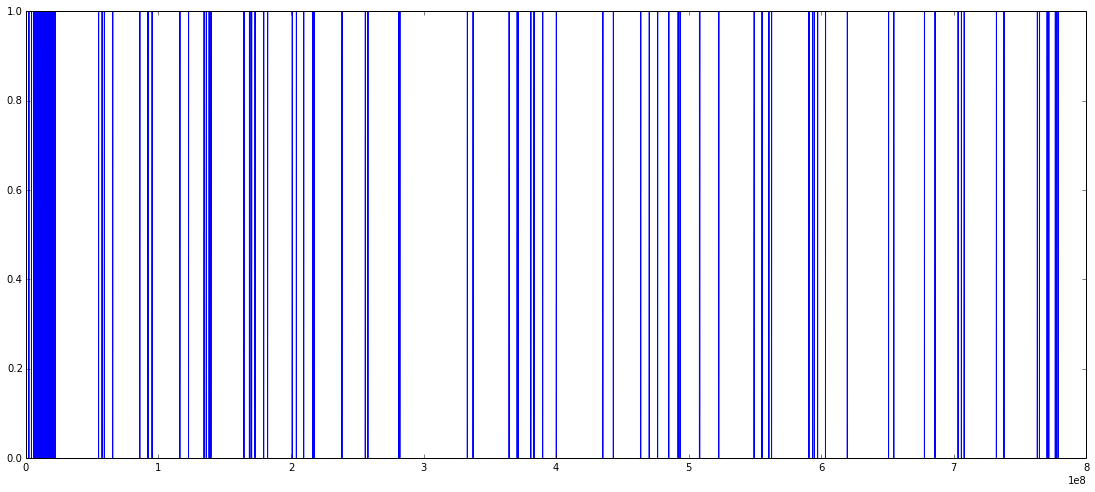

AGP U :: <type 'numpy.int8'>


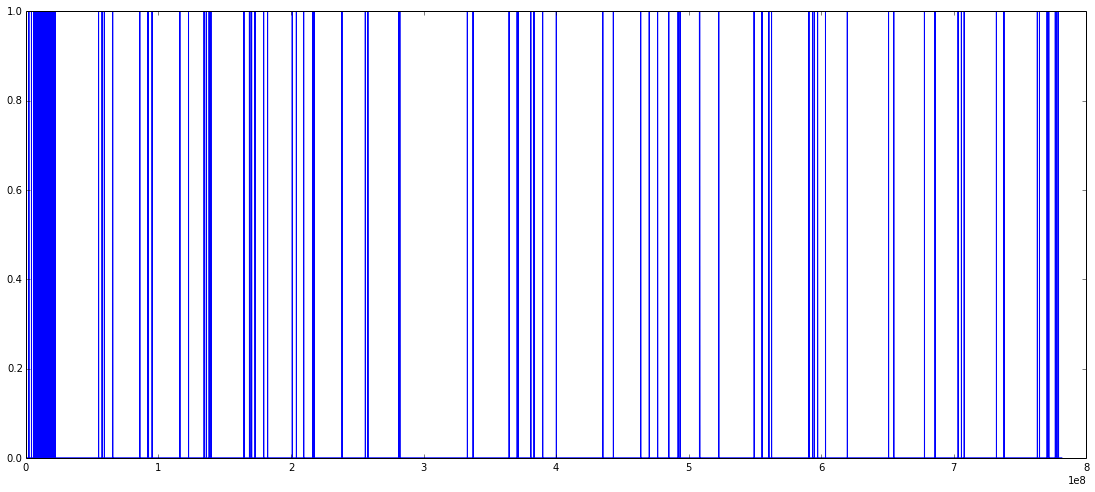

AGP W :: <type 'numpy.int8'>


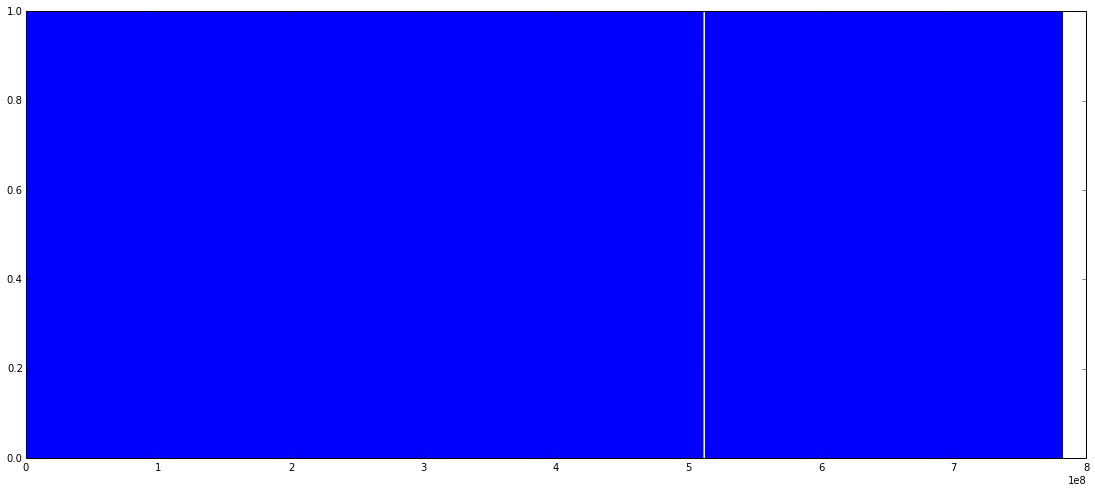

AGP N :: <type 'numpy.int8'>


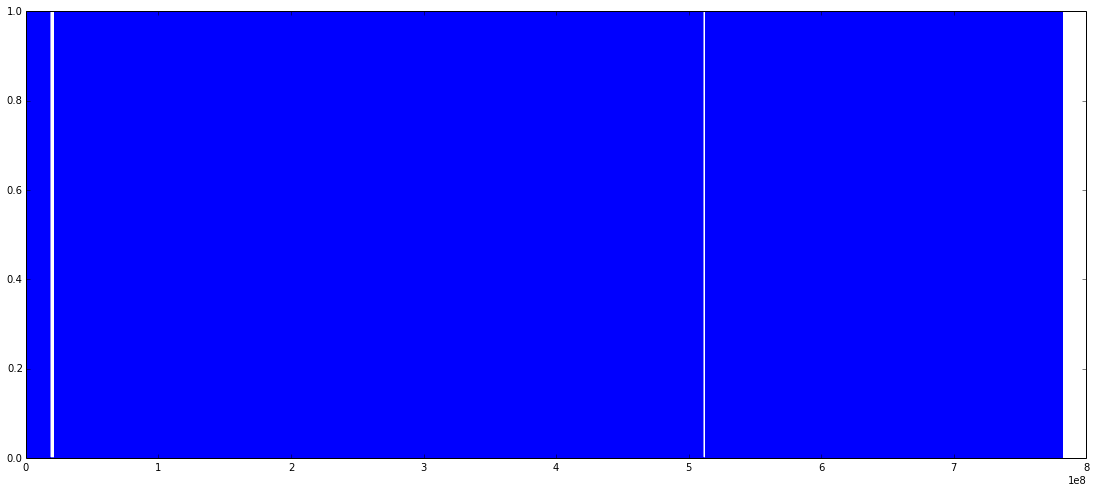

AGP U :: <type 'numpy.int8'>


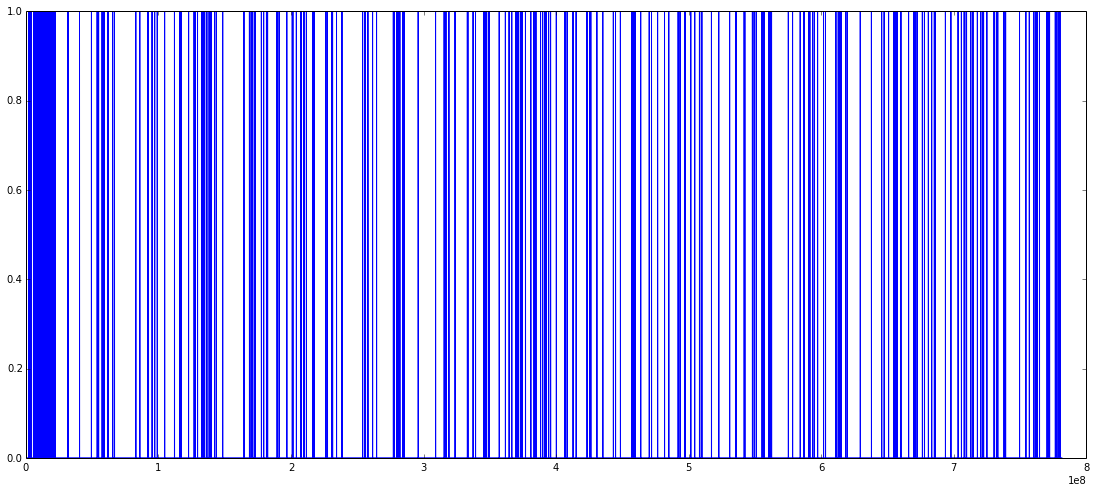

GFF match :: cDNA :: match


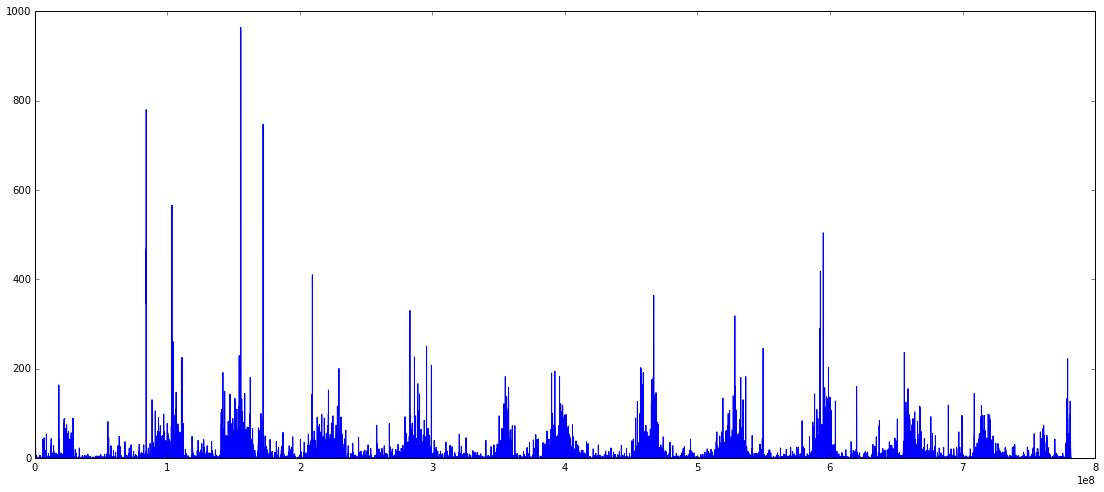

GFF match_part :: cDNA :: match_part


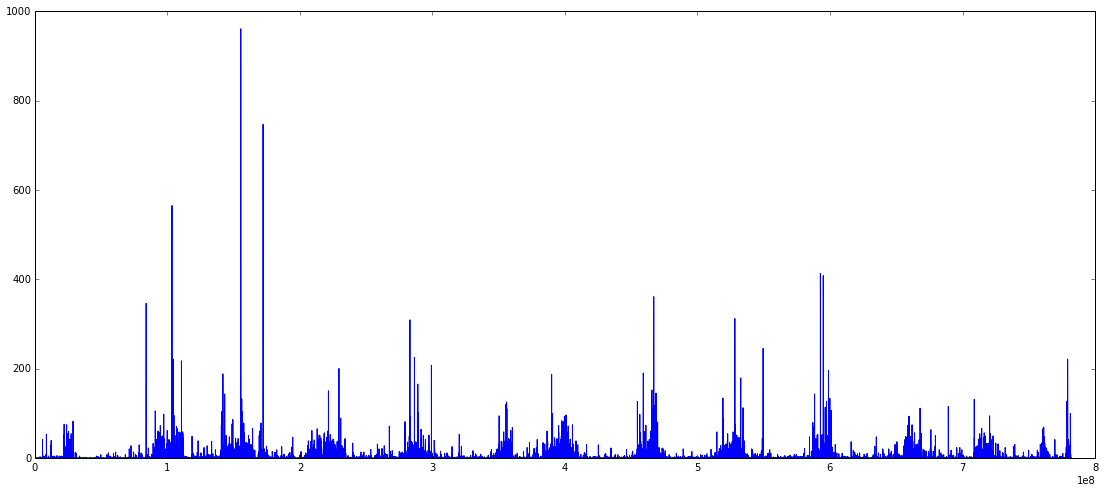

GFF gene :: Gene Model :: gene


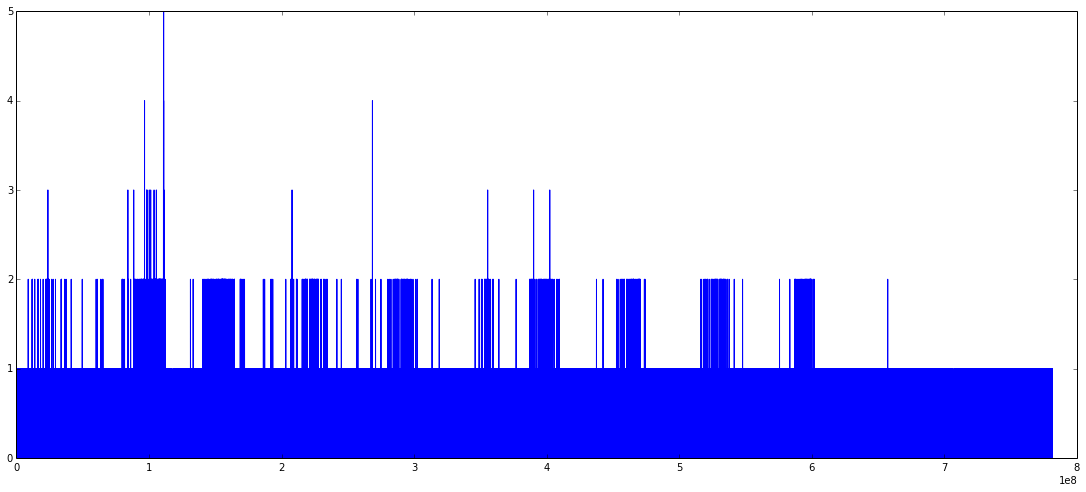

GFF mRNA :: Gene Model :: mRNA


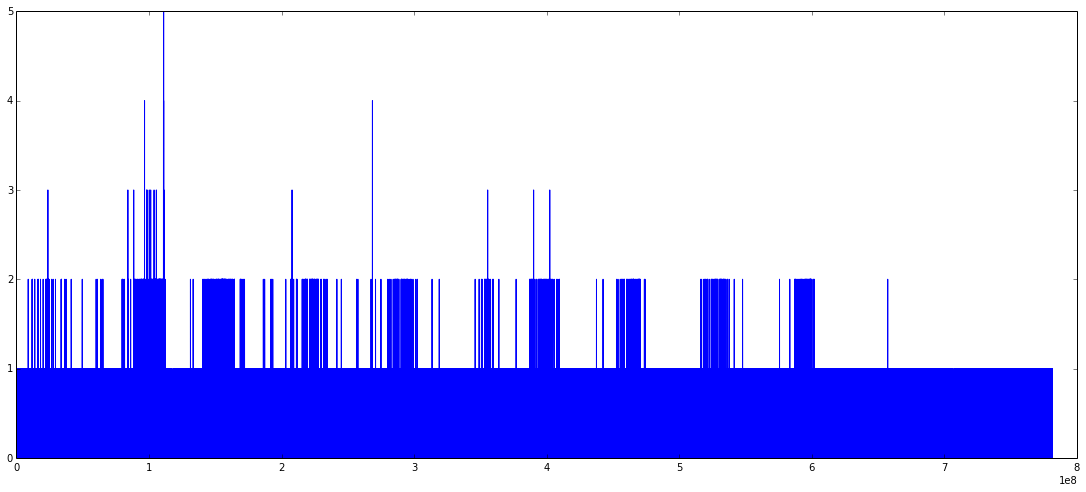

GFF exon :: Gene Model :: exon


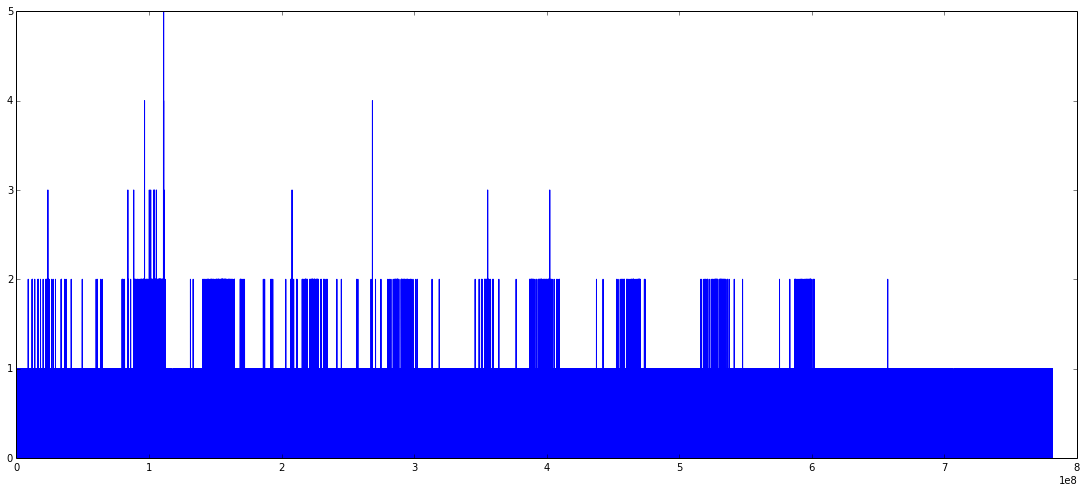

GFF CDS :: Gene Model :: CDS


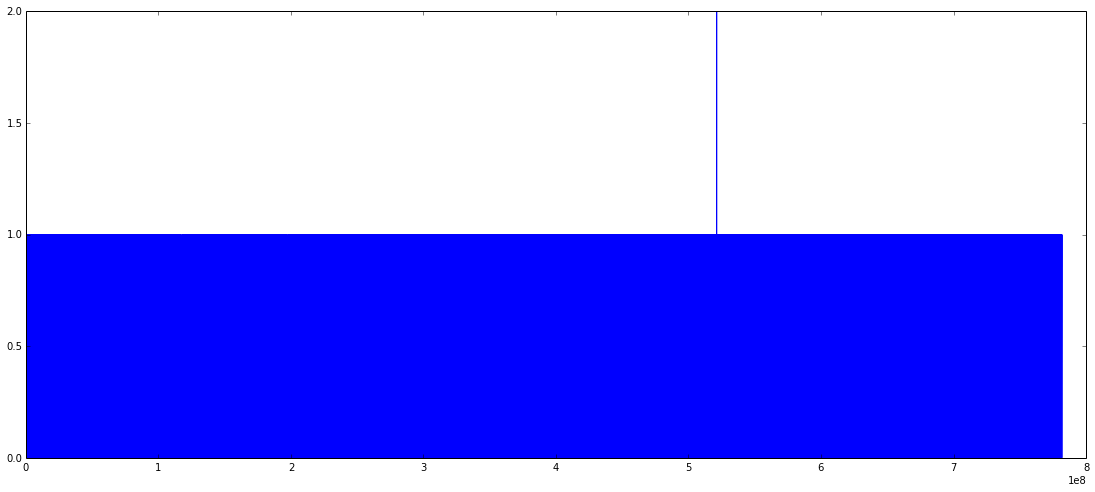

GFF intron :: Gene Model :: intron


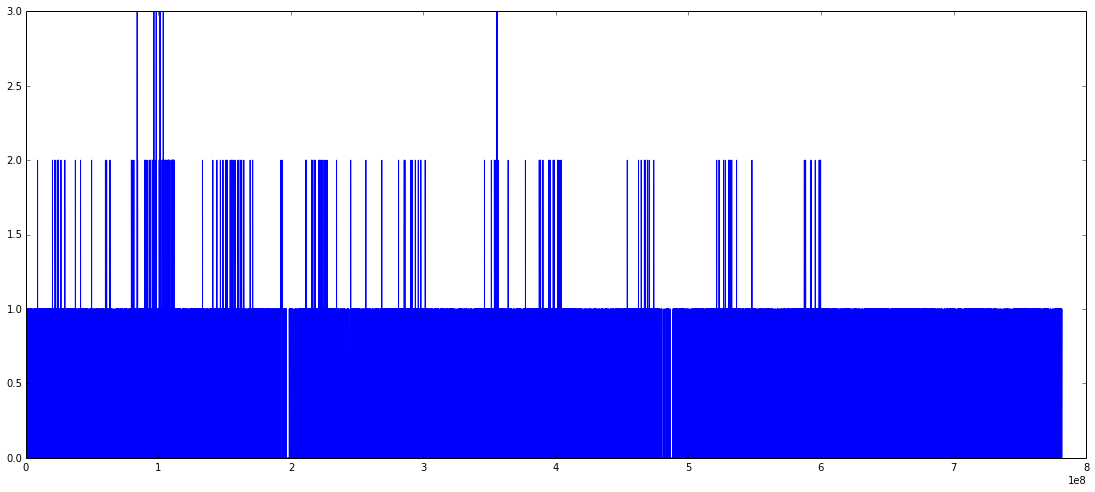

GFF BAC_clone :: BAC :: BAC_clone


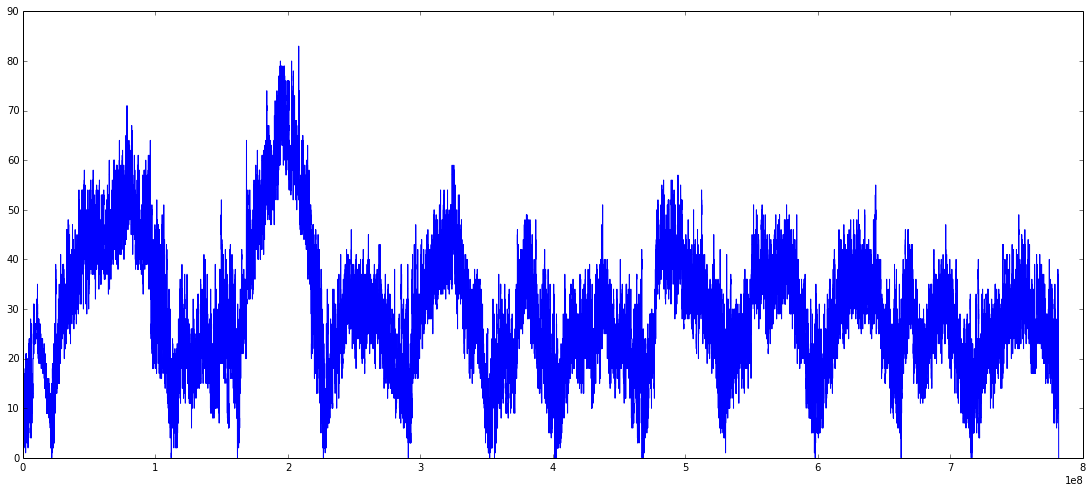

GFF BAC_end :: BAC :: BAC_end


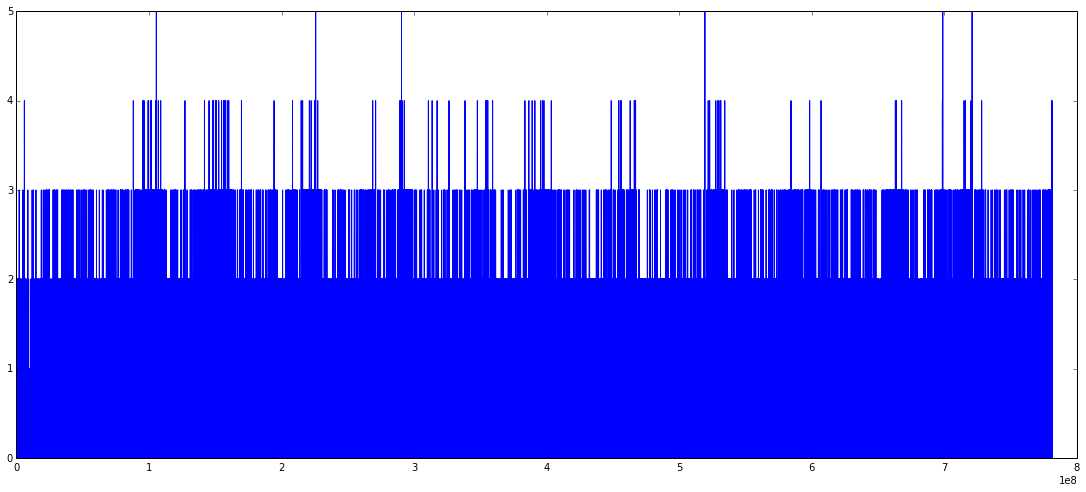

GFF repeat_region :: Repeat :: Copia


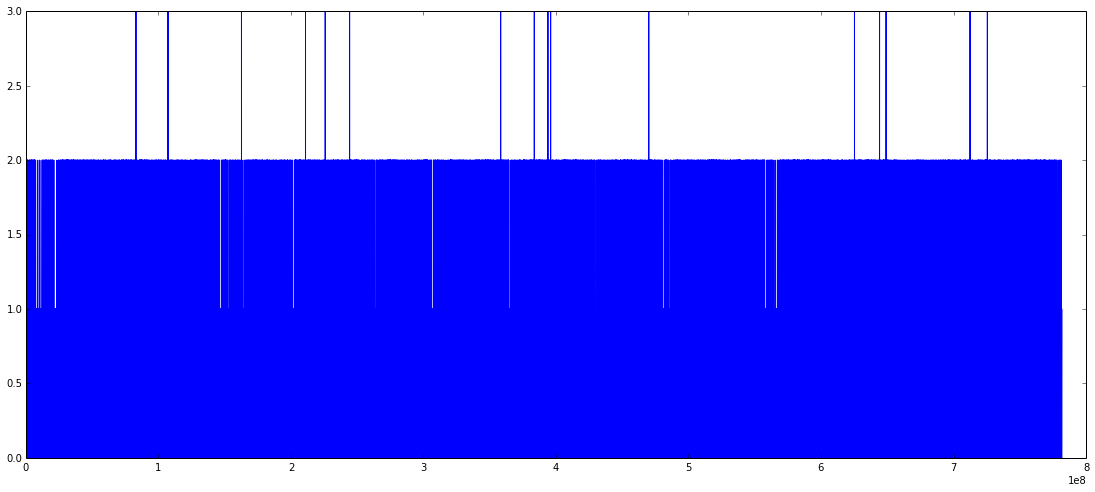

GFF repeat_region :: Repeat :: LTR


OverflowError: Allocated too many blocks

GFF repeat_region :: Repeat :: Low_complexity


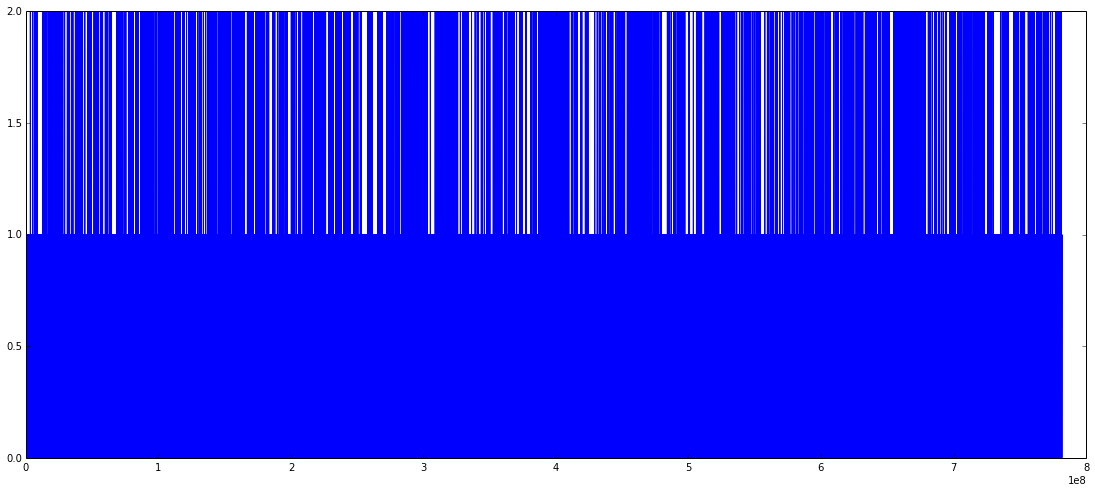

GFF repeat_region :: Repeat :: Gypsy


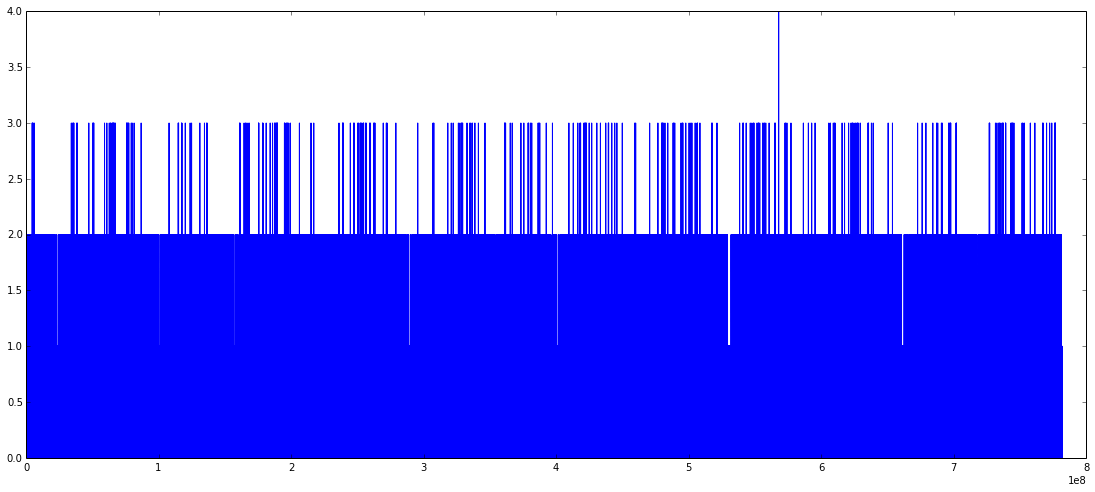

GFF repeat_region :: Repeat :: Simple_repeat


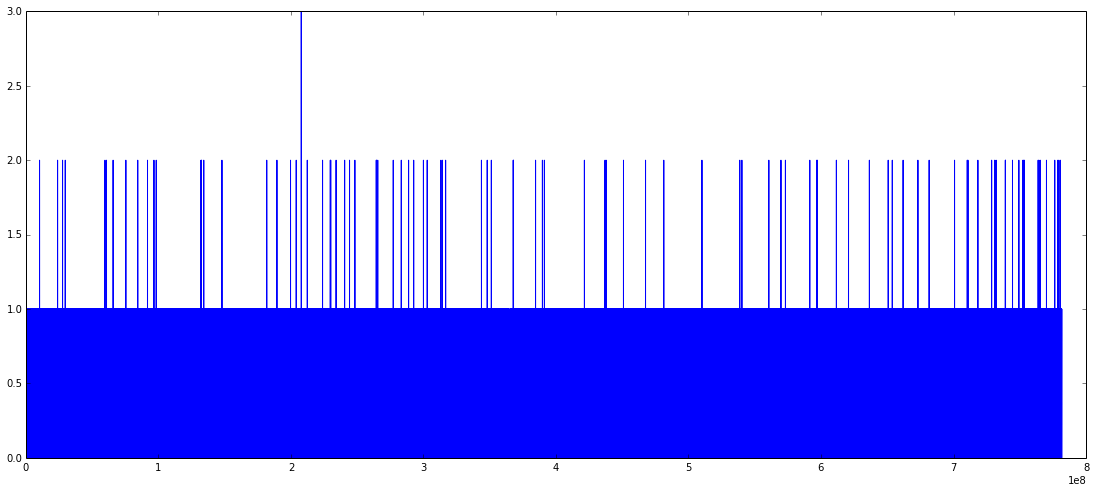

GFF repeat_region :: Repeat :: SINE


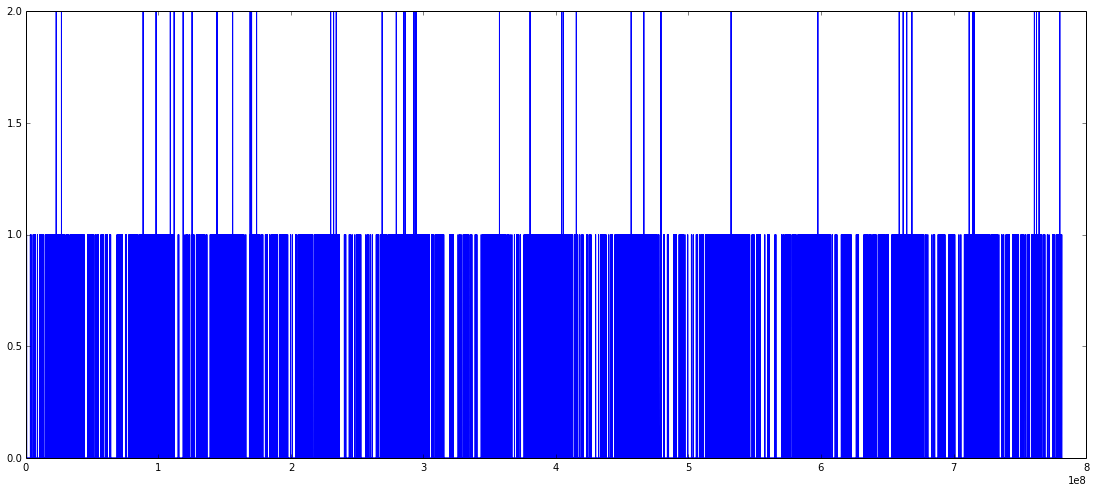

In [55]:
for proc in processes:
    title = proc['title']
    print title

    if not proc['enabled']:
        continue

    data  = proc['cov'  ]

    with size_controller(FULL_FIG_W, FULL_FIG_H):
        plt.plot(data, markevery=10, label=title)
        show()
        #display( plt.gcf() )
        pass

In [56]:
#S_lycopersicum_chromosomes.2.40.fa_SL2.40ch12_000065480000_000065486252.fasta SL2.40ch12 92.80 625               42         3            5629   6252 703152 703774 0.0    744
#query                                                                         subject    %id   alignment length  mismatches gap openings qstart qend sstart send   evalue bitscore 
import decimal
def decimal_float(v):
    return float(decimal.Decimal(v))
    
col_info_blast = [
    ["query_name"       , str           ],
    ["subject_name"     , str           ],
    ["perc_identity"    , float         ],
    ["alignment length" , int           ],
    ["mismatches"       , int           ],
    ["gap openings"     , int           ],
    ["qstart"           , int           ],
    ["qend"             , int           ],
    ["sstart"           , int           ],
    ["send"             , int           ],
    ["evalue"           , float         ],
    ["bitscore"         , float         ]
]

col_info_blast_k = dict( zip( [x[0] for x in col_info_blast], range(len(col_info_blast)) ) )
print col_info_blast_k

{'perc_identity': 2, 'mismatches': 4, 'qend': 7, 'alignment length': 3, 'evalue': 10, 'bitscore': 11, 'subject_name': 1, 'gap openings': 5, 'query_name': 0, 'send': 9, 'qstart': 6, 'sstart': 8}


In [57]:
from IPython.parallel import Client
pc = Client()
pc.ids
print pc[:].apply_sync(lambda : "Hello, World")
dview = pc[:]
parallel_result = dview.map_sync(lambda x: x**10, range(32))
print parallel_result

['Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World', 'Hello, World']
[0, 1, 1024, 59049, 1048576, 9765625, 60466176, 282475249, 1073741824, 3486784401, 10000000000, 25937424601, 61917364224, 137858491849, 289254654976, 576650390625, 1099511627776, 2015993900449, 3570467226624, 6131066257801, 10240000000000, 16679880978201, 26559922791424, 41426511213649, 63403380965376, 95367431640625, 141167095653376, 205891132094649, 296196766695424, 420707233300201, 590490000000000, 819628286980801]


In [58]:
def load_blast_chrom_db(BLAST_VAL_TYPE, BLAST_COL_TYPE, chromTotalLen, chroms, chrom_folder, f_folder):
    import numpy  as np
        
    chrom_blast_data  = None
    chrom_coord_count = 0
    chrom_pos_count   = 0

    chrom     = os.path.basename( chrom_folder )
    print '  chrom %s' % chrom

    file_path    = chrom_folder + '.blast'
    file_path_py = file_path + '.' + BLAST_VAL_TYPE + '.cov.npy'

    print '   file %s' % file_path

    chrom_blast_data = None
    if os.path.exists( file_path_py ):
        print "   loading coverage from pickle"
        sys.stdout.flush()
        chrom_blast_data    = np.load( open(file_path_py, 'rb') )
        print "   loaded coverage from pickle"
        print '    chrom  average %6.3f' % ( np.mean(chrom_blast_data ) )
        return 0, 0, chrom_blast_data
    
    else:
        print "   loading coverage from raw"
        sys.stdout.flush()
        sys.stdout.write('   ')

        chrom_blast_data      = np.zeros(chromTotalLen, dtype=BLAST_COL_TYPE)
        chrom_data_controller = coortroller(chrom_blast_data, chroms)

        with open( file_path, 'r' ) as fhd:
            for line in fhd:
                line = line.strip()
                cols = line.split("\t")
                #print cols
                cols = [ col_info_blast[i][1](v) for i,v in enumerate(cols) ]
                #print cols
                fields = dict(zip( col_info_blast_k.keys(), [ cols[v] for k,v in col_info_blast_k.items() ]))
                #print keys

                start               = min([fields['sstart'], fields['send']])
                end                 = max([fields['sstart'], fields['send']])

                chrom_coord_count  += 1
                chrom_pos_count    += end - start

                if chrom_coord_count % 1000000 == 0:
                    sys.stdout.write('.')
                    sys.stdout.flush()

                #print "Start:'" + str(start) + "' End: '" + str(end) + "'"
                if BLAST_VAL_TYPE == 'COUNT':
                    value = 1
                elif BLAST_VAL_TYPE == 'SYM':
                    value = fields['perc_identity'] / 100.0

                chrom_data_controller.add( fields['subject_name'], start, end, value )
                #break
        print
        print "   loaded coverage from raw"
        print "   saving coverage to pickle"
        sys.stdout.flush()
        np.save( open(file_path_py, 'wb'), chrom_blast_data )
        print '   chromosome %s added %10d coordinates in a total of %10d positions. average %6.3f' % ( chrom, chrom_coord_count, chrom_pos_count, np.mean(chrom_blast_data) )
        
        return chrom_coord_count, chrom_pos_count, chrom_blast_data

pc[:]['load_blast_chrom_db'] = load_blast_chrom_db
pc[:]['coortroller'        ] = coortroller

with pc[:].sync_imports():
    import os
    import sys

#dview.push(load_blast_chrom_db)
@dview.parallel(block=True)
def p_load_blast_chrom_db(params):
    return load_blast_chrom_db(*params)
    

importing os on engine(s)
importing sys on engine(s)


In [59]:
def load_blast_db(f_method, f_fasta, f_folder, BLAST_VAL_TYPE):
    if   BLAST_VAL_TYPE == 'COUNT':
        BLAST_COL_TYPE = col_type_int32
        
    elif BLAST_VAL_TYPE == 'SYM':
        BLAST_COL_TYPE = col_type_flo32
    
    else:
        print "unknown blast val type %s" % BLAST_VAL_TYPE
        raise 'error'
    
    
    
    print "blast method %s folder %s" % ( f_method, f_folder )
    f_folder_py = f_folder + '.' + BLAST_VAL_TYPE + '.cov.npy'

    if os.path.exists(f_folder_py):
        print " getting blast method from pickle"
        sys.stdout.flush()
        method_blast_data  = np.load( open(f_folder_py, 'rb') )
        blast_to_parse[btp].append(method_blast_data)
        print " got blast method from pickle"
        print ' method average %6.3f' % ( np.mean(method_blast_data) )
        return 0, 0, method_blast_data

    else:
        print " getting blast method from raw"
        method_blast_data  = np.zeros(chromTotalLen, dtype=BLAST_COL_TYPE)
        method_coord_count = 0
        method_pos_count   = 0
        cov                = None
        chroms_to_process  = []

        for chrom_folder in sorted(glob(os.path.join(os.path.abspath(f_folder), '*'))):
            if not os.path.isdir( chrom_folder ):
                continue

            chroms_to_process.append( [BLAST_VAL_TYPE, BLAST_COL_TYPE, chromTotalLen, chroms, chrom_folder, f_folder] )
            
            chrom_coord_count, chrom_pos_count, chrom_blast_data = load_blast_chrom_db(BLAST_VAL_TYPE, BLAST_COL_TYPE, chromTotalLen, chroms, chrom_folder, f_folder)

            print
            method_coord_count += chrom_coord_count
            method_pos_count   += chrom_pos_count
            method_blast_data  += chrom_blast_data
            print '    method average %6.3f' % ( np.mean(method_blast_data) )
            #break
        
        #print chroms_to_process
        sys.stdout.flush()
        
        #chrom_res = p_load_blast_chrom_db.map(chroms_to_process)

        #print chrom_res
        #sys.stdout.flush()
        #raise
        
        print '  method %s added %10d coordinates in a total of %10d positions. average %6.3f' % ( f_method, method_coord_count, method_pos_count, np.mean(method_blast_data) )
        np.save( open(f_folder_py, 'wb'), method_blast_data )
        
        return method_coord_count, method_pos_count, method_blast_data

In [60]:
if PARSE_BLAST:
    if1    = "probes/blast/out" #/SL2.40ch12/S_lycopersicum_chromosomes.2.40.fa_SL2.40ch12_000065480000_000065486252.fasta.blast"
    fasta  = 'S_lycopersicum_chromosomes.2.40.fa'
    #
    blast_to_parse = [ 
        #f_method  , f_enabled, f_fasta, f_folder
        ['standard', True     , fasta  , if1], 
    ]

    print "%d blast experiments" % len(blast_to_parse)

1 blast experiments


In [61]:
import fnmatch
import os
from glob import glob

if PARSE_BLAST:
    total_coord_count = 0
    total_pos_count   = 0
    
    BLAST_VAL_TYPE    = 'COUNT'
    BLAST_VAL_TYPE    = 'SYM'
    
    for btp in xrange(len(blast_to_parse)):
        f_method, f_enabled, f_fasta, f_folder = blast_to_parse[btp]
        
        if not f_enabled:
            continue
        
        method_coord_count, method_pos_count, method_blast_data = load_blast_db(f_method, f_fasta, f_folder, BLAST_VAL_TYPE)

        total_coord_count += method_coord_count
        total_pos_count   += method_pos_count
        blast_to_parse[btp].append(method_blast_data)
            
    print 'total added %10d coordinates in a total of %10d positions' % ( total_coord_count, total_pos_count )

blast method standard folder probes/blast/out
 getting blast method from pickle
 got blast method from pickle
 method average 445.675
total added          0 coordinates in a total of          0 positions


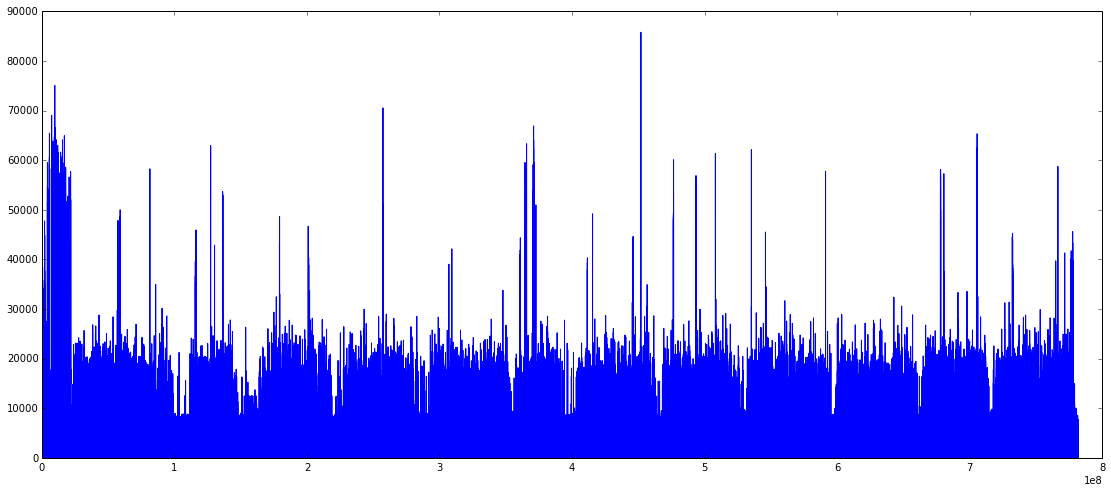

In [62]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    for btp in blast_to_parse:
        plt.plot(btp[-1], markevery=10)

In [63]:
addHeader(2,'Coverage')

In [ ]:
DO_COVERAGE = True
if DO_COVERAGE:
    COVERAGE_COL_TYPE = col_type_int32

    sam_coverage_data = None
    SamFile_py       = SamFile + '.cov.npy'
    if os.path.exists(SamFile_py):
        print " getting sam coverage from pickle"
        sys.stdout.flush()
        sam_coverage_data  = np.load( open(SamFile_py, 'rb') )
        print " got sam coverage from pickle"
        print ' sam coverage average %6.3f' % ( np.mean(sam_coverage_data) )

    else:
        print " getting sam coverage from raw"
        sys.stdout.flush()
        sam_coverage_data            = np.zeros(chromTotalLen, dtype=COVERAGE_COL_TYPE)
        sam_coverage_data_controller = coortroller(sam_coverage_data, chroms)
        sam_coverage_coord_count     = 0
        sam_coverage_pos_count       = 0
    
        with open_file(SamFile, 'r') as fhd:
            lc = 0
            for line in fhd:
                line = line.strip()
                if len(line) == 0:
                    continue
                if line[0] == '@':
                    continue
                #print line
                cols = line.split('\t')
                if len(cols) < 11:
                    print cols
                    continue
                if cols[2] == '*':
                    continue
                #print cols
                chrom  =     cols[2]
                start  = int(cols[3])
                seq    =     cols[9]
                seqLen = len(cols[9])
                end    = start + seqLen
                #print "chrom %s start %12d end %12d seq %s len %4d" % (chrom, start, end, seq, seqLen)
                
                sam_coverage_coord_count  += 1
                sam_coverage_pos_count    += end - start

                if sam_coverage_coord_count % 1000000 == 0:
                    sys.stdout.write('.')
                    sys.stdout.flush()

                sam_coverage_data_controller.add( chrom, start, end, 1 )
                
        print '    sam coverage average %6.3f' % ( np.mean(sam_coverage_data) )
        np.save( open(SamFile_py, 'wb'), sam_coverage_data )

In [ ]:
with size_controller(FULL_FIG_W, FULL_FIG_H):
    plt.plot(sam_coverage_data, markevery=10)

In [ ]:
rep = np.repeat(['00', '01', '02'], [1, 2, 3])
print rep
ran = np.concatenate([ np.arange(1, x+1) for x in (1,2,3)])
print ran
con = np.concatenate([rep, ran])
print con
res = con.reshape(2,6)
print res
tra = np.transpose(res)
print tra

In [ ]:
# OrderedDict([('SL2.40ch00', 21805821)
#CovChroms = np.repeat([x for x in chroms], [chroms[x] for x in chroms])
#print CovChroms

In [ ]:
#CovPos = np.concatenate([ np.arange(1, x+1) for x in [chroms[x] for x in chroms]])
#print CovPos
#con = np.concatenate([rep, ran])
#print con
#res = con.reshape(2,6)
#print res
#tra = np.transpose(res)
#print tra

In [ ]:
#del AgpCov
#AgpCov = pd.DataFrame(OrderedDict([ ('AgpW', AgpCovW), ('AgpU', AgpCovU) ]), dtype='int8')
#AgpCov.head()

In [ ]:
#AgpCov.dtypes

In [ ]:
#AgpCov.shape

In [ ]:
#AgpCov.memory_usage(index=True)

In [ ]:
#AgpCov.memory_usage(index=True).sum()

In [ ]:
#AgpCov.index

## K-mer Coverage File

In [ ]:
addHeader(2,'K-mer Coverage File')

col_info = [
    [ "Position"                             , col_type_int ], 
    [ "K-mer Coverage"                       , col_type_flo ], 
    [ "K-mer Coverage averaged: 500 bp"      , col_type_flo ], 
    [ "K-mer Coverage averaged: 2.5 Kbp"     , col_type_flo ], 
    [ "K-mer Coverage averaged: 5 Kbp"       , col_type_flo ], 
    [ "K-mer Coverage averaged: 50 Kbp"      , col_type_flo ], 
    [ "K-mer Coverage averaged: 1 Mbp"       , col_type_flo ], 
    [ "K-mer Coverage averaged: 5 Kbp before", col_type_flo ], 
    [ "K-mer Coverage averaged: 5 Kbp after" , col_type_flo ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print "\n".join( col_names )

In [ ]:
SKIP_ROWS = 1

print KmerCoverageFile

KmerData  = pd.read_csv(KmerCoverageFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")
    
print "Loaded %d rows and %d columns" % ( KmerData.shape[0], KmerData.shape[1] )

if PARSE_VERBOSE:
    print KmerData.head()

## Sequencing Coverage File

In [ ]:
addHeader(2,'Sequencing Coverage File')

col_info = [
    [ "Position"                             , col_type_int ], 
    [ "Sequencing Coverage"                  , col_type_int ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [ ]:
SKIP_ROWS = 0

print SequencingCoverageFile

SequencingCoverageData  = pd.read_csv(SequencingCoverageFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")

print "Loaded %d rows and %d columns" % ( SequencingCoverageData.shape[0], SequencingCoverageData.shape[1] )

if PARSE_VERBOSE:
    print SequencingCoverageData.head()

In [ ]:
if BAC_MODE:
    addHeader(2,'BLAST')

    col_info = [
        [ "Position"                             , col_type_int ], 
        [ "BLAST Coverage"                       , col_type_flo ]
    ]

    col_names=[cf[0] for cf in col_info]
    col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

    if PARSE_VERBOSE:
        print col_names
        col_types

In [ ]:
if BAC_MODE:
    SKIP_ROWS = 0
    
    print BlastCoverageFile
    
    BlastCoverageData  = pd.read_csv(BlastCoverageFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                            skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")
        
    print "Loaded %d rows and %d columns" % ( BlastCoverageData.shape[0], BlastCoverageData.shape[1] )
    
    if PARSE_VERBOSE:
        print BlastCoverageData.head()

## AGP

In [ ]:
addHeader(2,'AGP')
SKIP_ROWS = 0

### Contig

In [ ]:
addHeader(3,'Contig')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Contig"                  , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [ ]:
print AgpContigFile

AgpContigData  = pd.read_csv(AgpContigFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")

print "Loaded %d rows and %d columns" % ( AgpContigData.shape[0], AgpContigData.shape[1] )

if PARSE_VERBOSE:
    print AgpContigData.head()

### Gap

In [ ]:
addHeader(3,'Gap')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Gap"                     , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [ ]:
print AgpGapFile

AgpGapData  = pd.read_csv(AgpGapFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")
    
print "Loaded %d rows and %d columns" % ( AgpGapData.shape[0], AgpGapData.shape[1] )

if PARSE_VERBOSE:
    print AgpGapData.head()

### Unknown

In [ ]:
addHeader(3,'Unknown')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Unknown"                 , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [ ]:
print AgpUnknownFile

AgpUnknownData  = pd.read_csv(AgpUnknownFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")
    
print "Loaded %d rows and %d columns" % ( AgpUnknownData.shape[0], AgpUnknownData.shape[1] )

if PARSE_VERBOSE:
    print AgpUnknownData.head()

### Other

In [ ]:
addHeader(3,'Other')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "AGP Other"                   , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [ ]:
print AgpOtherFile

AgpOtherData  = pd.read_csv(AgpOtherFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")

print "Loaded %d rows and %d columns" % ( AgpOtherData.shape[0], AgpOtherData.shape[1] )

if PARSE_VERBOSE:
    print AgpOtherData.head()

## Ns

In [ ]:
addHeader(2,'Ns')

col_info = [
    [ "Position"                    , col_type_int ], 
    [ "Ns"                          , col_type_bol ]
]

col_names=[cf[0] for cf in col_info]
col_types=dict(zip([c[0] for c in col_info], [c[1] for c in col_info]))

if PARSE_VERBOSE:
    print col_names
    col_types

In [ ]:
print NsFile

NsData  = pd.read_csv(NsFile, header=None, names=col_names, dtype=col_types, nrows=NROWS, \
                        skiprows=SKIP_ROWS, verbose=PARSE_VERBOSE, delimiter="\t", comment="#")
    
print "Loaded %d rows and %d columns" % ( NsData.shape[0], NsData.shape[1] )

if PARSE_VERBOSE:
    print NsData.head()

# Merge

In [ ]:
addHeader(1,'Merge')

Data = pd.DataFrame(KmerData, copy=True)

Data.combine_first( KmerData )
Data[ "AGP Contig"          ] = AgpContigData[          "AGP Contig"          ]
Data[ "AGP Gap"             ] = AgpGapData[             "AGP Gap"             ]
Data[ "AGP Unknown"         ] = AgpUnknownData[         "AGP Unknown"         ]
Data[ "AGP Other"           ] = AgpOtherData[           "AGP Other"           ]
Data[ "Ns"                  ] = NsData[                 "Ns"                  ]
Data[ "Sequencing Coverage" ] = SequencingCoverageData[ "Sequencing Coverage" ]
if BAC_MODE:
    Data[ "BLAST Coverage"  ] = BlastCoverageData[      "BLAST Coverage"      ]

print "Saved %d rows and %d columns" % ( Data.shape[0], Data.shape[1] )

if PARSE_VERBOSE:
    print Data.head()

# Plot

## K-mer Coverage Stats

In [ ]:
addHeader(1,'Plot')
addHeader(2,'K-mer Coverage Stats')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = Data.boxplot(column=["K-mer Coverage", 
                               "K-mer Coverage averaged: 500 bp",
                               "K-mer Coverage averaged: 2.5 Kbp",
                               "K-mer Coverage averaged: 5 Kbp",
                               "K-mer Coverage averaged: 50 Kbp",
                               "K-mer Coverage averaged: 1 Mbp",
                               "K-mer Coverage averaged: 5 Kbp before",
                               "K-mer Coverage averaged: 5 Kbp after"], return_type='dict', rot=45)
    
    plt.setp(bqc['boxes'   ], color='black')
    plt.setp(bqc['medians' ], color='black')
    plt.setp(bqc['whiskers'], color='black')
    plt.setp(bqc['fliers'  ], color='black')
    
    for of in output_files['K-mer Coverage Stats']:
        print "Saving Image:", of
        savefig(of)

## Sequencing Coverage Stats

In [ ]:
addHeader(2,'Sequencing Coverage Stats')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    bqc = Data.boxplot(column=['Sequencing Coverage'], return_type='dict')
    
    plt.setp(bqc['boxes'   ], color='black')
    plt.setp(bqc['medians' ], color='black')
    plt.setp(bqc['whiskers'], color='black')
    plt.setp(bqc['fliers'  ], color='black')
    
    for of in output_files['Sequencing Coverage Stats']:
        print "Saving Image:", of
        savefig(of)

In [ ]:
if BAC_MODE:
    addHeader(2,'BLAST Coverage Stats')
    
    with size_controller(FULL_FIG_W, FULL_FIG_H):
        bqc = Data.boxplot(column=['BLAST Coverage'], return_type='dict')
        plt.setp(bqc['boxes'   ], color='black')
        plt.setp(bqc['medians' ], color='black')
        plt.setp(bqc['whiskers'], color='black')
        plt.setp(bqc['fliers'  ], color='black')

        for of in output_files['BLAST Coverage Stats']:
            print "Saving Image:", of
            savefig(of)

## K-mer Coverage Distribution

In [ ]:
addHeader(2,'K-mer Coverage Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["K-mer Coverage"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)

        for of in output_files['K-mer Coverage Distribution']:
            print "Saving Image:", of
            savefig(of)

## Sequencing Coverage Distribution

In [ ]:
addHeader(2,'Sequencing Coverage Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["Sequencing Coverage"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)

        for of in output_files['Sequencing Coverage Distribution']:
            print "Saving Image:", of
            savefig(of)

In [ ]:
if BAC_MODE:
    addHeader(2,'BLAST Coverage Distribution')
    
    with size_controller(FULL_FIG_W, FULL_FIG_H):
        hf = Data[ Data["BLAST Coverage"] > 0 ]['Position']
    
        print "Number of rows:", hf.size

        if hf.size > 0:
            hs = hf.hist(color=HISTOGRAM_COLOR)
            
            for of in output_files['BLAST Coverage Distribution']:
                print "Saving Image:", of
                savefig(of)

## Gaps Distribution

In [ ]:
addHeader(2,'Gaps Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["AGP Gap"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)
        
        for of in output_files['Gaps Distribution']:
            print "Saving Image:", of
            savefig(of)

## Ns Distribution

In [ ]:
addHeader(2,'Ns Distribution')

with size_controller(FULL_FIG_W, FULL_FIG_H):
    hf = Data[ Data["Ns"] > 0 ]['Position']
    
    print "Number of rows:", hf.size

    if hf.size > 0:
        hs = hf.hist(color=HISTOGRAM_COLOR)
        
        for of in output_files['Ns Distribution']:
            print "Saving Image:", of
            savefig(of)

## CSV Output

In [ ]:
addHeader(2,'CSV Output')

SAMPLE_EVERY = 1

while ( Data.shape[0] / SAMPLE_EVERY ) > MAX_ROWS:
    SAMPLE_EVERY += 1
    
print "Original Size %d rows and %d columns" % ( Data.shape[0], Data.shape[1] )

if SAMPLE_EVERY != 1:
    print "SAMPLING EVERY %d ROWS" % SAMPLE_EVERY
    
    for of in output_files['all_data_full']:
        print "Saving full data to: ", of
        Data.to_csv(of, sep='\t', index=False)
    
    DataSampled = Data[::SAMPLE_EVERY]

    print "New Size %d rows and %d columns" % ( DataSampled.shape[0], DataSampled.shape[1] )
    
    if PARSE_VERBOSE:
        print DataSampled.head()

else:
    print "no need to sample"
    DataSampled = Data


for of in output_files['all_data']:
    print "Saving data to     :", of
    DataSampled.to_csv(of, sep='\t', index=False)

## Combined Graph

In [ ]:
addHeader(2,'Combined Graph')

num_cols = len(cols_to_plot)
#print "\n".join( [ str( (x, y[0]) ) if y is not None else str( (x, "None") ) for x,y in enumerate(cols_to_plot) ] )

with size_controller(CHROM_FIG_W, CHROM_FIG_H):
    if True:
        #fig, axes = plt.subplots(nrows=len(cols_to_plot)+2, ncols=1)
        f = plt.figure()
        
        plt.subplots_adjust(wspace=0.5, hspace=0.5)

        num_extra_rows = 3
        num_row_span   = 3
        
        num_cols_e     = num_cols + (num_extra_rows*num_row_span)
        axes           = []

        axes.append( plt.subplot2grid((num_cols_e,1), (0           , 0), rowspan=num_row_span) )
        axes.append( plt.subplot2grid((num_cols_e,1), (num_row_span, 0), rowspan=num_row_span) )
        
        #print "num_extra_rows", num_extra_rows
        #print "num_row_span  ", num_row_span
        #print "num_cols_e    ", num_cols_e
        
        if BAC_MODE:
            axes.append( plt.subplot2grid((num_cols_e,1), (num_row_span*2, 0), rowspan=num_row_span) )
        else:
            axes.append( None )
            
        for i in xrange ( num_cols - num_extra_rows ):
            #print 'i', i, 'y', (num_extra_rows*num_row_span)+i
            axes.append( plt.subplot2grid((num_cols_e,1), ((num_extra_rows*num_row_span)+i, 0) ) )

        #print "num_cols", num_cols
        #print "axes"    , len(axes)

        for axis_i, axis in enumerate(axes):
            #print "For axis", axis_i, "Plotting col", col_to_plot_i,
            
            if axis is None:
                #print "skip"
                continue
                
            #print "ok"
            #for col_to_plot_i, col_to_plot_info in enumerate(cols_to_plot):
            col_to_plot, col_ylim, col_yticks = cols_to_plot[axis_i]
            
            p = DataSampled[col_to_plot].plot(ax=axis, kind='area', stacked=False, color=ALL_GRAPH_COLOR)
            
            axis.set_title(col_to_plot)
            
            if col_ylim is not None:
                col_ylim_min, col_ylim_max = col_ylim
                
                if col_ylim_min is not None:
                    axis.set_ylim( bottom = col_ylim_min )
                
                if col_ylim_max is not None:
                    axis.set_ylim( top    = col_ylim_max )
            
            
            if col_yticks is not None:
                if col_yticks == 0:
                    axis.set_yticks([])
                    
                else:
                    ylim_min, ylim_max = axis.get_ylim()
                    ylim_diff = ylim_max - ylim_min
                    ylim_step = ylim_diff / (col_yticks*1.0)
                    #print col_to_plot, ylim_min, ylim_max, ylim_diff, ylim_step
                    axis.set_yticks(np.arange(ylim_min,ylim_max+ylim_step,ylim_step))
            
    plt.tight_layout()
    curr_fig = plt.gcf()
    #curr_fig.set_size_inches(CHROM_FIG_W/5.0, CHROM_FIG_H/5.0)
    for of in output_files['Combined graph']:
        print "Saving Image:", of
        curr_fig.savefig(of, dpi=300)
    #curr_fig.set_size_inches(CHROM_FIG_W, CHROM_FIG_H)

In [ ]:
if CONFIG_LOCAL:
    %run -i probes_cfg_footer.ipynb